# =========================================
# PLOT basics Part 2
# =========================================

# -------------------------------------------------
# BARPLOTS - COMPARING MULTIPLE DATASETS
# -------------------------------------------------

In [15]:
"""
    imports and data for BAR PLOTS below
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data: the number of gold, silver and bronze medals 
# of the top five countries at the 2016 Olympic Games:
data = pd.DataFrame({
    "country":['USA', 'GB', 'China', 'Russia', 'Germany'],
    "bronze_medals":[38, 17, 26, 19, 15],
    "silver_medals":[37, 23, 18, 17, 10],
    "gold_medals":[46, 27, 26, 19, 17],
    "total_medals":[121,67,70,55,42]
})

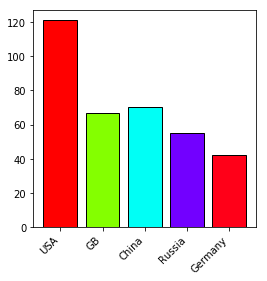

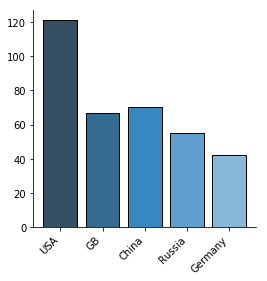

[(0.20516724336793543, 0.30851211072664364, 0.3825759323337178),
 (0.21045751633986928, 0.4196078431372549, 0.5694989106753813),
 (0.21747533000128158, 0.5305292836088684, 0.7548225041650647),
 (0.36775599128540304, 0.624400871459695, 0.8030501089324619),
 (0.5216147635524798, 0.7205074971164936, 0.8524259900038447)]

In [24]:
"""
    BAR PLOT, with colors from cmap
"""
# prepare colors
my_cmap = plt.cm.get_cmap('hsv')
colors = my_cmap(np.linspace(0,1,5))

# barplot
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(np.arange(1,6), "total_medals", data=data, color=colors,edgecolor="black")
ax.set_xticks(np.arange(1,6)) # must be done for barplot, 
#                               otherwise you dont get good results
ax.set_xticklabels(data["country"].values, rotation="45", ha="right")
plt.show();


# barplot with colors selected from one of the sns color palettes
cmap = plt.cm.get_cmap("cubehelix", 5) # only for cmap compatible functions
colors = sns.color_palette("Blues_d", 5) # generates list wiht colors


# barplot
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(np.arange(1,6), "total_medals", data=data, color=colors, edgecolor="black")
ax.set_xticks(np.arange(1,6)) # must be done for barplot, 
#                               otherwise you dont get good results
ax.set_xticklabels(data["country"].values, rotation="45", ha="right")
sns.despine() # works here too :)
plt.show();


colors

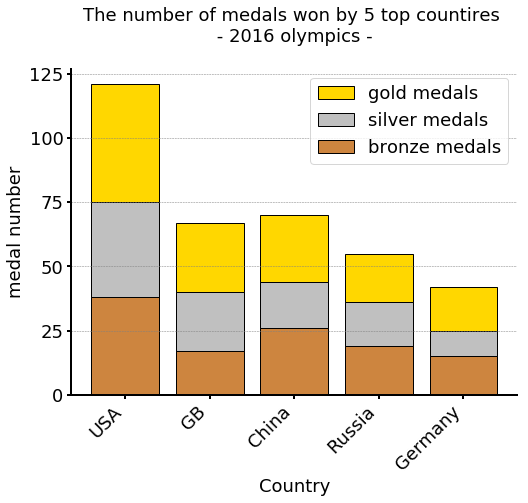

In [31]:
"""
    Nice stacked bar plot
"""

fig, ax = plt.subplots(figsize=(8,6), facecolor="white")

# we start from the top, 
# the bottom has all other categories
ax.bar(np.arange(5),"gold_medals", data=data, color="gold", edgecolor="black",
       bottom=data["silver_medals"]+data["bronze_medals"], label='gold medals')
ax.bar(np.arange(5),"silver_medals", data=data, color="silver", edgecolor="black",
       bottom=data["bronze_medals"], label='silver medals')
ax.bar(np.arange(5),"bronze_medals", data=data, color='#CD853F', edgecolor="black",
       bottom=[0]*5, label='bronze medals')

# ticksx & labels
ax.set_yticks([0,25,50,75,100,125])
ax.set_xticks(np.arange(5))
ax.set_xticklabels(data["country"].values, rotation="45", ha="right", fontsize=18)
ax.set_yticklabels([0,25,50,75,100,125], rotation="0", ha="right", fontsize=18)
plt.ylabel("medal number", fontsize=18)
plt.xlabel("Country", fontsize=18)
plt.title("The number of medals won by 5 top countires \n - 2016 olympics - \n",fontsize=18)

# format ticks
ax.tick_params(axis='x', colors='black', direction='out', length=4, width=2) # tick only
ax.tick_params(axis='y', colors='black', direction='out', length=4, width=2) # tick only    
ax.yaxis.set_ticks_position('left')# shows only that
ax.xaxis.set_ticks_position('bottom')# shows only that

# remove ticks, and axes, yopu dot'n want
ax.spines['top'].set_visible(False) # remove ...
ax.spines['right'].set_visible(False) # remove ...  
ax.spines['bottom'].set_linewidth(2) # x axis width
ax.spines['left'].set_linewidth(2) # y axis width 

ax.yaxis.grid(color='grey', linestyle='--', linewidth=0.5) # horizontal lines
#ax.xaxis.grid() # vertical lines

# legends and display
ax.legend(loc="upper right", scatterpoints=1, fontsize=18)
plt.show();

# --------------------------------------
# Histogram - how it is made?
# --------------------------------------

[(1, 9), (10, 18), (19, 27), (28, 36), (37, 45), (46, 54), (55, 63)]

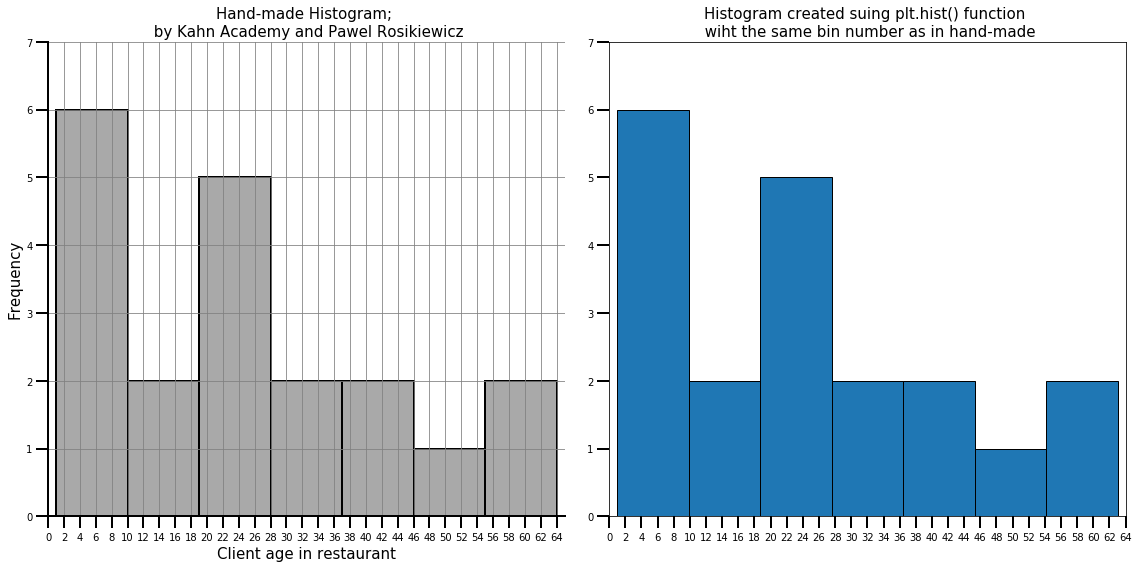

In [25]:

"""
    How a histogram is being made:
    I implemented this code, following instruction from Khan's academy
    https://www.youtube.com/watch?v=gSEYtAjuZ-Y
"""
# import
import numpy as np
import math as math
import matplotlib.pyplot as plt

# data; client ages in restaurant
data = [1, 3, 4, 5, 6, 9, 16, 18, 19, 22, 25, 
        26, 27, 29, 32, 42, 45, 51, 58, 63] # sorted(data)


# 1. - decide on the number of bins/buckets
bin_nr = 7

# 2nd   Calculate bin size
#       the 2nd and 3rd points are the most important part or caulations, 
#       becuase all values in a data will be assignt to each bin, based on their, number, size and range

#       In our example we will use the following formula:
#.      *. bin_size = (max_value - min_vale)/bin_nr
##      *. results will be rounded up, and if we encounter the whole number eg. 5, we will add 1 to it
#.         (it is done, so the bars are touching each other on a plot)
#.         eg: 5.456 -> 6
#.             5     -> 6
#.             6     -> 7
#       Caution: 
#.      the differences in histograms calculated wiht different methods 
#.      comes from different bin size and range.

#.      Our example
#       expected results are: if bin_nr = 7; bin_size = 9

bin_size = (max(data)-min(data))/bin_nr
if math.ceil(bin_size)==bin_size:  
    bin_size +=1
else: 
    bin_size = math.ceil(bin_size)
      
# 3.  Calculate bin ranges; 
#.    * Caution, the results will be different if you start at 0!!
#.    here we start at min(data) that is equal to 1.
#.    * the end of the last bin may go over the max(data)

#.    Our example
#     if bin_nr=7; it shoudl be [(1, 9), (10, 18), (19, 27), (28, 36), (37, 45), (46, 54), (55, 63)]

bin_sizes = []
for i in range(0,bin_nr):
    if i == 0:
        start = min(data)
        end = start+bin_size-1
    else:
        start = end+1
        end = start+bin_size-1
    bin_sizes.append((start, end))

    
# 4.  Calculate frequency for each bin
#.    i.e assign each value from the datasets to each bin, 
#.    and check how many of them is there.

bin_frequency = []
for i in range(bin_nr):
    
    start =  bin_sizes[i][0]
    end = bin_sizes[i][1]
    bin_freq = np.sum([1 if (x>=start) & (x<=end) else 0 for x in data]) 
    # Caution, this algorith would work only wiht integers, not floats.
    bin_frequency.append(bin_freq)

    # results:
    # data = [1, 3, 4, 5, 6, 9, 16, 18, 19, 22, 25, 26, 27, 29, 32, 42, 45, 51, 58, 63]
    #
    # id      bin     |  frequency
    # -------------------------------
    # 1.   (1, 9)     |      6
    # 2.   (10, 18)   |      2
    # 3.   (19, 27)   |      5
    # 4.   (28, 36)   |      2
    # 5.   (37, 45)   |      2
    # 6.   (46, 54)   |      1
    # 7.   (55, 63)   |      2

# 5.  Create a histogram 
#     for this, we will use recatagular patches:
#.    that take the following parameters: Rectangle(xy, width, height[, angle])

# import required function
from matplotlib.patches import Rectangle 

# create a figure
fig = plt.figure(figsize=(16,8))

# ---------------------------
# hand made hist wiht rectangels
# ---------------------------
ax = fig.add_subplot(121)
for i in range(bin_nr):
    bottom_left_X = bin_sizes[i][0]
    bottom_left_Y = 0 # all bars starts at 0, in that example
    bin_width = bin_size
    bin_height = bin_frequency[i]
    ax.add_patch(Rectangle((bottom_left_X, bottom_left_Y), bin_width, bin_height, 
                           alpha=1, color="darkgrey",ec="black", lw=2))
    
# set up axes limits, title and labels
ax.set_xlim(bin_sizes[0][0]-1,bin_sizes[bin_nr-1][1]+2)
ax.set_ylim(0, max(bin_frequency)+1)
ax.set_xlabel("Client age in restaurant", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.set_title("Hand-made Histogram; \n by Kahn Academy and Pawel Rosikiewicz", fontsize=15)

# remove lines on right and top
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
# set color and line width for visible spines
ax.spines['bottom'].set_color("black") # x axis
ax.spines['left'].set_color("black")   # y axis
ax.spines['bottom'].set_linewidth(2) # x axis
ax.spines['left'].set_linewidth(2) # x axis

# add more ticks than by default
ax.set_xticks(list(range(0,max(data)+2,2)))

# set color, size and direction for ticks
ax.tick_params(axis='x', colors='black', direction='out', length=12, width=2) # tick only
ax.tick_params(axis='y', colors='black', direction='out', length=12, width=2) # tick only

# Show ticks only on the visible spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# add grid to easier read the data in each bin
ax.grid(True, color="grey")


# ---------------------------
# hist with plt.hist()
# ---------------------------

# create a figure
ax = fig.add_subplot(122)
ax.hist(data, bins=bin_nr, edgecolor="black")

# limits, title, and ticks (like before)
ax.set_xlim(bin_sizes[0][0]-1,bin_sizes[bin_nr-1][1]+1)
ax.set_ylim(0, max(bin_frequency)+1)
ax.set_xticks(list(range(0,max(data)+2,2)))
ax.set_title("Histogram created suing plt.hist() function \n wiht the same bin number as in hand-made", fontsize=15)

# Only show ticks on the left and bottom spines, and makde then as before.
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x', colors='black', direction='out', length=12, width=2) # tick only
ax.tick_params(axis='y', colors='black', direction='out', length=12, width=2) # tick only

# !!! we ommited some eastetics to make the code shorter !!!

# Finally, fix layout 
# so the text and histograms do not overal with each other 
plt.tight_layout()
bin_sizes

# =========================================
# PLOT basics Part 3 
# SEABORN PACKAGE
# =========================================

#### Link
* https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

#### Advatages:   
* sns provides high-level commands to create a variety of plot types useful for statistical data exploration, and some statistical model fitting.  
* sns is adapted for work with pandas objects, such as pd series and dataframes!   

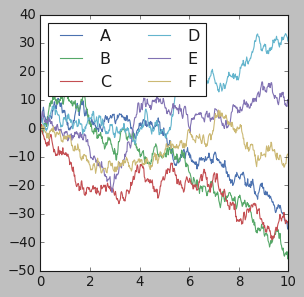

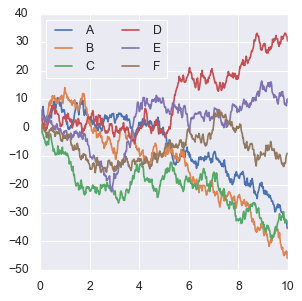

In [216]:
"""
    Seaborn Basics - random walk example
"""
# imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Random walk visualized by matplotlib only ####

# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# set classic plt style (otherwisen it will be overwriten by sns)
plt.style.use("classic")

# Plot the data with Matplotlib defaults
fig = plt.figure(figsize=(4,4))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');
plt.show();

## Now we will add sns.set() commad, to create new plot with seaborn support ####
## Caution: sns has the ability to overwrite plt functions, and adds its own eastetics ####

# set() sns style ('tick') by default
sns.set()

# again plot the data with the same functions as in plt
fig = plt.figure(figsize=(4,4))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');
plt.show()

### ---------------------------------------
### PLOTTING DISTRIBUSIONS WITH SNS
### ---------------------------------------

* for one or small number of datasets


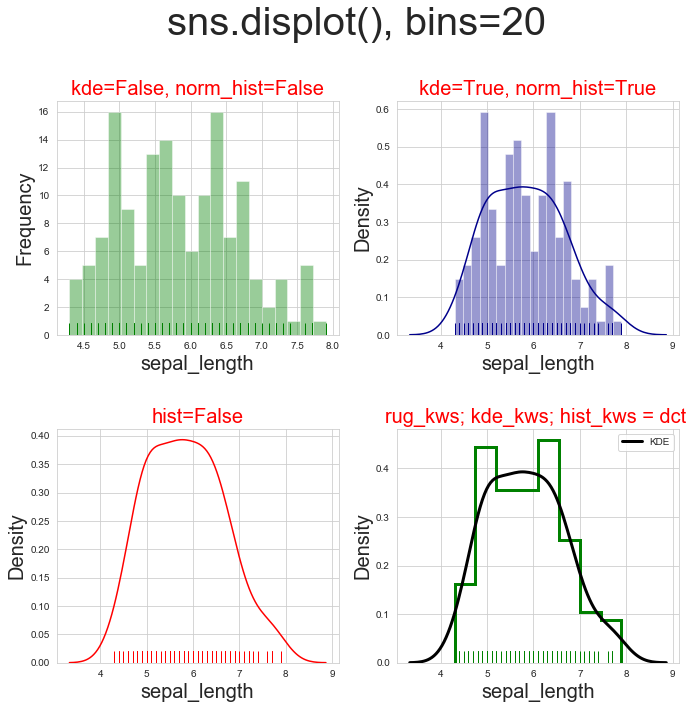

In [9]:
"""
    sns.displot()
    
    Important Parameters:
    .  hist      - if false, will show only the other option, like kde line
    .  kde       - gaussian kernel density estimate
    .  rug       - rugplot on the support axis, like a barcode on the hist bottom
    .  norm_hist - True, the hist. height shows a density rather than a count. 
              if kde=True, norm_hist=True by default !!!
    more at:          
    https://seaborn.pydata.org/generated/seaborn.distplot.html
"""

# data
iris = sns.load_dataset('iris')
col_name = 'sepal_length'
bin_nr = 20

# figure
sns.set_style('whitegrid') # 'ticks', by default, other: 'dark'
fig = plt.figure(figsize=(10,10))
fig.suptitle(f"sns.displot(), bins={bin_nr}",fontsize=40)

# sns.displot() 
#.    wiht bars showing frequency, like in a regular hist
ax = fig.add_subplot(221)
ax = sns.distplot(iris[col_name], hist=True, bins=bin_nr, kde=False, rug=True, norm_hist=False, 
                  color="green", vertical=False)
ax.set_xlabel(col_name,fontsize=20)
ax.set_ylabel("Frequency",fontsize=20) 
ax.set_title(f"kde=False, norm_hist=False",fontsize=20, color="red")

# sns.displot() 
#.    the histogram height shows a density rather than a count
ax = fig.add_subplot(222)
ax = sns.distplot(iris[col_name], hist=True, bins=bin_nr, kde=True, rug=True, norm_hist=True, 
                  color="darkblue", vertical=False)
ax.set_xlabel(col_name,fontsize=20)
ax.set_ylabel("Density",fontsize=20) 
ax.set_title(f"kde=True, norm_hist=True",fontsize=20, color="red")


# sns.displot() 
#.    without hist
ax = fig.add_subplot(223)
ax = sns.distplot(iris[col_name], hist=False, bins=bin_nr, kde=True, rug=True, norm_hist=True, 
                  color="red", vertical=False)
ax.set_xlabel(col_name,fontsize=20)
ax.set_ylabel("Density",fontsize=20) 
ax.set_title(f"hist=False",fontsize=20, color="red")

# sns.displot() 
#.    without more customozation, parameters give in dictionaries
#     please see the link, below the title for more info.
ax = fig.add_subplot(224)
ax = sns.distplot(iris[col_name], rug=True, 
                   rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})
ax.set_xlabel(col_name,fontsize=20)
ax.set_ylabel("Density",fontsize=20) 
ax.set_title(f"rug_kws; kde_kws; hist_kws = dct ",fontsize=20, color="red")


plt.tight_layout()
fig.subplots_adjust(top=0.85, hspace=0.4)# to adjust for main title, amd legend


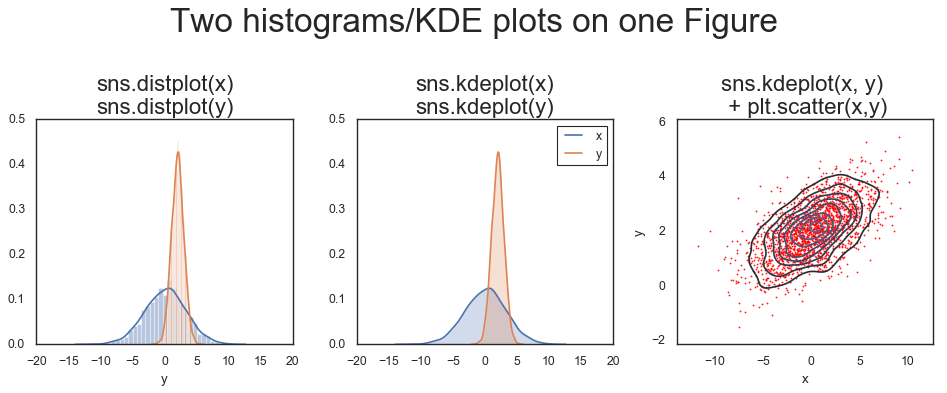

In [78]:
"""
    Two histograms with sns.kdeplot() & sns.distplot()
"""
# data in pd.dataFrame
data = np.random.multivariate_normal([0, 2], [[11, 2], [2, 1]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

fig = plt.figure(figsize=(12,5))
fig.suptitle("Two histograms/KDE plots on one Figure", fontsize=30)

plt.subplot(131)
sns.distplot(data['x'])
sns.distplot(data['y']);
plt.ylim(0,.5)
plt.xlim(-20,20)
plt.title("sns.distplot(x)\nsns.distplot(y)", fontsize=20)

plt.subplot(132)
for col in 'xy':
    sns.kdeplot(data[col], shade=True) 
    # caution, whe you giv e a string to for lopp, 
    # for loop will iterate over each character in that string !!
plt.ylim(0,.5)
plt.xlim(-20,20)
plt.title("sns.kdeplot(x)\nsns.kdeplot(y)", fontsize=20)

plt.subplot(133)
sns.kdeplot(data['x'],data['y'], n_levels=10)
plt.scatter(data['x'],data['y'], s=0.4, color="red", alpha=0.9)
plt.title("sns.kdeplot(x, y) \n + plt.scatter(x,y)", fontsize=20)


# make all labels and titiles visible, wihtoput overlapping
plt.tight_layout()
fig.subplots_adjust(top=0.7, hspace=0.4)
plt.show();

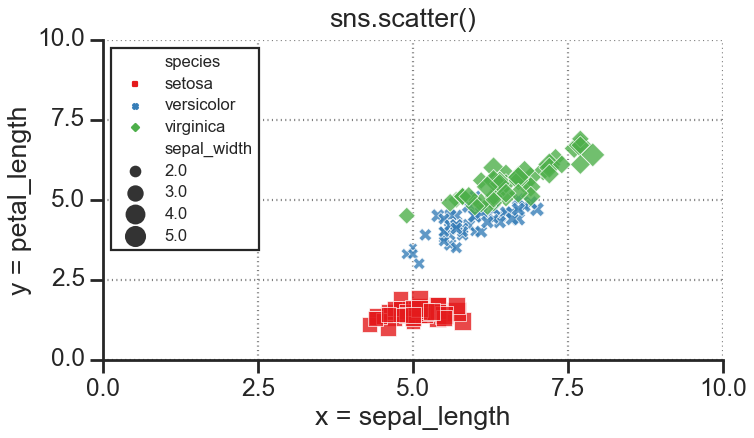

In [325]:
"""
    sns.scatterplot()
    
    individual plot; ie. can be subplotted 
    used by: sns.jointplot(), sns.pairplot()
    
    legend.         : {“brief”, “full”, False}; then you may use:
                      ax.legend(scatterpoints, frameon, loc, labelspacing, fontsize)
                      If “brief”, numeric hue and size var's will be represented with a sample of evenly spaced values
                      
    dataseries:
      hue           : variable to groupndatapoints, aaffects the color, categorical
      style         : same as hue, affects point style (shape), categorical
    
    
    
    
"""
plt.close("all")

# data
iris = sns.load_dataset('iris')
iris.head()

# style
sns.set_context("poster")
sns.set_style("ticks")

# fig
fig = plt.figure(figsize=(10,5))
fig.suptitle("sns.scatter()")

# plots
ax = fig.add_subplot(111)
markers = {"setosa": "s", "versicolor": "X", "virginica":"D"}
ax = sns.scatterplot(x="sepal_length" , y="petal_length", data=iris, 
                     hue="species", palette="Set1",
                     style="species",markers=markers, size="sepal_width",
                     alpha=0.8, legend="brief")


# plot aestetics
ax.set(xlabel="x = sepal_length", ylabel="y = petal_length", xlim=(0,10), ylim=(0,10))
ax.grid(color="grey", ls=":")

# ticks and spines
# ax.tick_params(axis="x", color="black", direction="out", length=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
sns.despine()

# legend
ax.legend(scatterpoints=1, frameon=True, loc="upper left", labelspacing=0.4, fontsize=15)


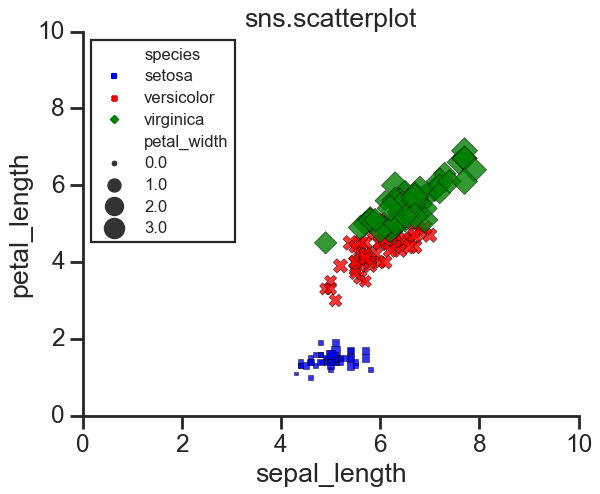

In [340]:
"""
    -------------------------------------------------------------------------------
    sns.scatterplot()
    -------------------------------------------------------------------------------
    individual plot; ie. can be subplotted 
    used by: sns.jointplot(), sns.pairplot()
    -------------------------------------------------------------------------------
    
    * legend.      : {“brief”, “full”, False}; then you may use:
                      ax.legend(scatterpoints, frameon, loc, labelspacing, fontsize)
                      If “brief”, numeric hue and size var's will be represented with 
                      a sample of evenly spaced values
                      
    * markers and dataseries:
      3 ways of introducing datasderies/values:
      with colors (hue), marker style (style), and marker size (size)
    
    > hue           : variable to groupndatapoints, aaffects the color, categorical
      - palette     : dict("group_name"="color") or sns.color_palette
      - color       : one color for all points, no hue, 
      - cmap.       : palette = cmap    
                          cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
                          ax = sns.scatterplot(x = "total_bill", y = "tip",data = tips 
                                               hue = "size", size = "size", palette = cmap)
      
    > style         : same as hue, affects point style (shape), categorical,
                      nessesarly, for markers
      - markers:    : dict("group_name"="point_style"), if not, it will use styles automatically
      - edgecolor   : color or "none", none makes léess problmes
      - linewidth   : can be ==0 to remove edgecolor plroblem
      
    > size          : like hue, size for each pointmor one value for all
      - sizes       : how sizes are chosen when size is used?
                      min-max size to normalize all other vaoues arround, form size list
                      sizes=(10,200)
      - s.          : ONE SIZE FOR ALL MARKERS
     -------------------------------------------------------------------------------
"""

# data
iris = sns.load_dataset('iris')

# style
sns.set_context("poster")
sns.set_style("ticks")

# dct's for plot
markers    = {"setosa": "s", "versicolor": "X", "virginica":"D"}
colors     = {"setosa": "blue", "versicolor": "red", "virginica":"green"}

# scatterplot
sns.scatterplot(     x="sepal_length" , y="petal_length", data=iris, 
                
                     # marker color 
                     hue="species", palette=colors, alpha=0.8, # color="blue"
                
                     # marker style (how it looks)
                     style="species", markers=markers, edgecolor="black", linewidth=0.5,
                
                     # markers size
                     size="petal_width", sizes=(10,300),
                
                     # legend
                     legend="brief")

# plot aestetics
plt.legend(scatterpoints=1, frameon=True, loc="upper left", labelspacing=0.4, fontsize=15)
plt.xlim(0,10) ; plt.ylim(0,10); plt.title("sns.scatterplot")
sns.despine()

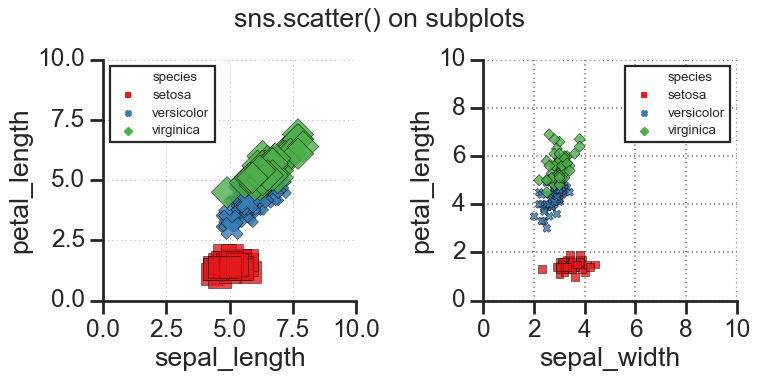

In [380]:
"""
    sns.scatterplot on subplots
"""

# style
plt.close("all") # remove all old settings
sns.set_context("poster")
sns.set_style("ticks")

# fig and dictionaries
fig = plt.figure(figsize=(10,5))
fig.suptitle("sns.scatter() on subplots")
markers = {"setosa": "s", "versicolor": "X", "virginica":"D"}

# first subplot
ax = fig.add_subplot(121)
ax = sns.scatterplot(x="sepal_length" , y="petal_length", data=iris, 
                     hue="species", palette="Set1",alpha=0.8,
                     s=400, style="species", markers=markers,linewidth=0.5,edgecolor="black",
                     legend="brief")
ax.set(xlim=(0,10), ylim=(0,10))
ax.grid(color="grey", ls=":", lw=0.5)

# ticks and spines and legend
ax.legend(scatterpoints=1, frameon=True, loc="best", labelspacing=0.4, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
sns.despine()

# second subplot
ax = fig.add_subplot(122)
ax = sns.scatterplot(x="sepal_width" , y="petal_length", data=iris, 
                     hue="species", palette="Set1",alpha=0.8,
                     s=50, style="species", markers=markers,linewidth=0.5,edgecolor="black",
                     legend="brief")
ax.set(xlim=(0,10), ylim=(0,10))
ax.grid(color="grey", ls=":", lw=2)

# ticks and spines and legend
ax.legend(scatterpoints=1, frameon=True, loc="best", labelspacing=0.4, fontsize=12)
sns.despine()

# final adjustements
plt.tight_layout(); fig.subplots_adjust(top=0.85, hspace=0.4); plt.show();



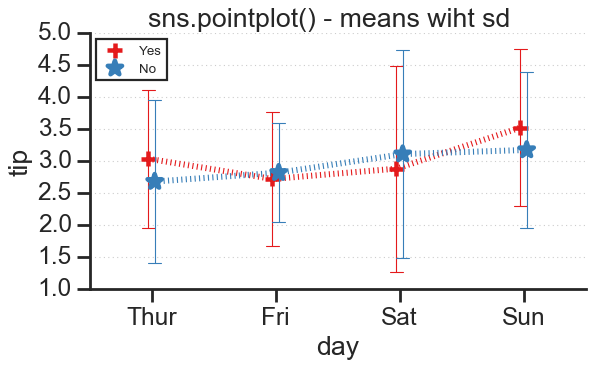

In [488]:
"""
    -------------------------------------------------------------------------------
    sns.pointplot()
    -------------------------------------------------------------------------------
    individual plot; ie. can be subplotted 
    to draw points wiht erro bars
    
    Used for: 
    - sns.catplot(kind="point"); it is safer than using FacetGrid,
      it ensures synchronization of variable order across facets:
    
    
    -------------------------------------------------------------------------------
    
    "data"
    - x, y, hue  : one axis is categorical, the other numerical
                    IMPORTANT : if some bins arte empty, using hue, thius will not make a problems
                                it will result in empt¥ spots on hue plot
    - data       : ..
    - dodge      : True/False, Separate the points for different hue levels along the categorical axis
    - orient     : "h"/"v", normally, unnesessary, but needed whrn bothdatasets are numberical, 
                   to decide whih will be categorical, and which numerical (with error bars)
    - estimator  : central tendency estimator .- takes funtions form other packages
                   estimator = {np.mean, np.median}

    "colors"
    - color.     : one color for one dataseries
    - palette.   : when hue, or more point series are drawn

    "markers"
    - markers    : one values, or list with cvalues for each dataset, 
    - order.     : list, eg: order=["Dinner", "Lunch"], to control the order to laying out the datasets
    - scale.     : affects, markers and lines, their size and thickness, 
                   can be overwriten wiht other params for lines
 
    "error bars"
    - errwidth     :  line width, used for error bars
    - capsize.     :  caution, values equal to categorical values below, use low values eg: 0.05
    - ci           :  conficdence interval eg: ci=68, or sd, ci=sd
    - orient       : "h"/"v", normally, unnesessary, but needed whrn bothdatasets are numberical, 
                      to decide whih will be categorical, and which numerical (with error bars)
                      
    "lines"
    - join.      : T/F; if False, points are not connected
    - linestyles : one values, or list with cvalues for each dataset,  
    
    "KNOWN ISSUES"
    * edgecolorS : for markers and lines, i couldnt find how to chnage them, typically these lines are not drawn
    * alpha      : not working
    
"""

# sns.set, data and figure
sns.set(style="ticks", context="poster")
tips = sns.load_dataset("tips"); tips.head()
fig = plt.figure(figsize=(8,4))
fig.suptitle("sns.pointplot() - means wiht sd")

# sns.pointplot()
# make is as ax = ... to have ax.set_ functionms
ax = sns.pointplot(y="tip", x="day", data=tips, hue="smoker",

                   # central tendency estimation, method {np.mean, np.meadia}
                   estimator = np.mean,
                   
                   # colors
                   palette="Set1",
                   
                   # markers
                   dodge=True, markers=["+","*"],scale=1,
                   
                   # line (True, to make it)
                   join=True, linestyles=[":",":"], linewidth=1,
                   
                   # error lines
                   errwidth = 1, capsize=.1, ci="sd"
                  )    

# grid, legend and despine
ax.yaxis.grid(True, linestyle=":", lw=1)
ax.legend(scatterpoints=1, frameon=True, loc="best", labelspacing=0.4, fontsize=12)
sns.despine()

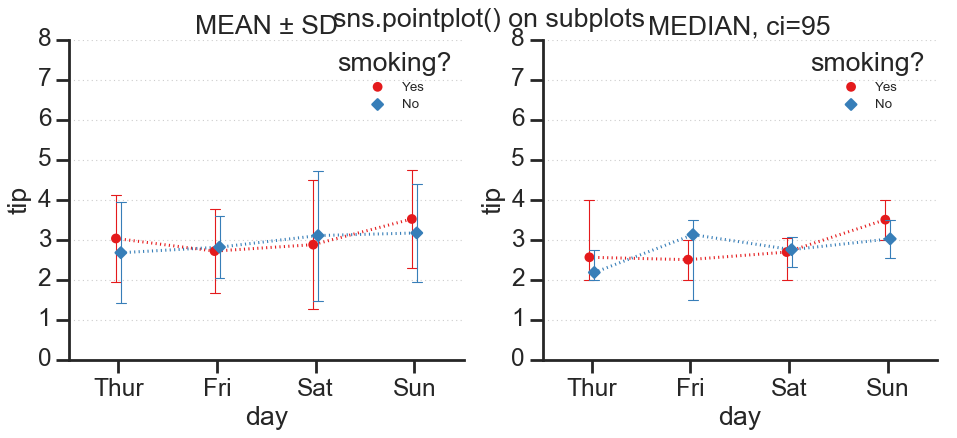

In [522]:
"""
    sns.pointplot() + subplot
"""

# style
plt.close("all") # remove all old settings
sns.set(context="poster", style="ticks")

# fig and dictionaries
fig = plt.figure(figsize=(14,5))
fig.suptitle("sns.pointplot() on subplots")


# first subplot
ax = fig.add_subplot(121)
ax = sns.pointplot(y="tip", x="day", data=tips, hue="smoker",
                   estimator = np.mean, errwidth = 1, capsize=.1, ci="sd",
                   palette="Set1", dodge=True, markers=["o","D"],scale=0.5,linestyles=":")    
ax.set(title="MEAN ± SD", ylim=(0,8))
ax.yaxis.grid(True, linestyle=":", lw=1); sns.despine()
ax.legend(scatterpoints=1, frameon=False, loc="best", labelspacing=0.4, fontsize=12, title="smoking?")


# second subplot
ax = fig.add_subplot(122)
ax = sns.pointplot(y="tip", x="day", data=tips, hue="smoker",
                   estimator = np.median, errwidth = 1, capsize=.1, ci=95,
                   palette="Set1", dodge=True, markers=["o","D"],scale=0.5,linestyles=":")    
ax.set(title="MEDIAN, ci=95", ylim=(0,8))
ax.yaxis.grid(True, linestyle=":", lw=1); sns.despine()
ax.legend(scatterpoints=1, frameon=False, loc="best", labelspacing=0.4, fontsize=12, title="smoking?")

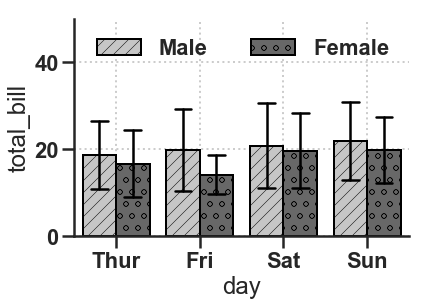

In [142]:
"""
    -------------------------------------------------------------------------------
    sns.barplot()
    -------------------------------------------------------------------------------
    individual plot; ie. can be subplotted 
    
    * input
    - x,y, hue, data, order, hue_order, dodge, 
    
    * error 
    - estimator       : scalar, Statistical function to estimate within each categorical bin
    - ci              : float or “sd” or None
    - n_boot          : nr of bootstrap iterations to use when computing confidence intervals
    
    * bar aestetics
    - orient          : “v” | “h”
    - color/palette   : ..., palette i)  dict, wiht levels from hue, 
                                     ii) obj interporetable by sns.color_palette()
                             Caution, if palette is used whiupout hue, it will 
                                     give diff. colors to each bar.
    - ax.patches      : see code example, list used to modiffy bar eastetics.
                        Important: bars are order as follows:
                        0 = category1, hue1, 0 = category2, hue1, 
                         2 = category1, hue2, 3 = category2, hue2, ...  
    
    - saturation      : ...
    ...
    - edgecolor       : bar borderline color, all bars
    - facecolor       : color for bars
    - linewidth       : as first, by line width.
    
    * error bars aestetics
    - errcolor
    - errwidth
    - capsize
    -------------------------------------------------------------------------------
"""

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

sns.set(context="poster", style="ticks")
tips = sns.load_dataset("tips")


ax = sns.barplot(x="day", y="total_bill", data=tips, hue = "sex", 
                 
                 # bars
                 dodge=True, 
                 palette="Greys", saturation=.5, 
                 linewidth=2, edgecolor="black",
                 
                 # error bars
                 estimator=np.mean, ci="sd",
                 capsize=.2, errwidth=2.5, errcolor="black"
                  )

# hatch param (color is set as bar edgecolor)
plt.rcParams['hatch.linewidth'] = 0.5


# Loop over the bars
some_hatche_styles = ['-', '+', 'x', '\\', '*', 'o']
hatches = ["//"]*4 + ["o"]*4 # first series of bars in hue, then second, ...
for i, bar in enumerate(ax.patches):
    bar.set_hatch(hatches[i])    

    
# ax.set_hatch(["/",'//']) ; not working, but should
# more at https://stackoverflow.com/questions/42185000/add-hash-pattern-to-a-seaborn-bar-plot?rq=1
ax.set(ylim=(0,50))
ax.legend(loc="best", ncol=2, frameon=False)
ax.grid(ls=":")
sns.despine()

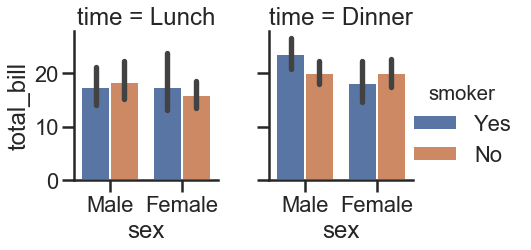

In [135]:
"""
    sns.barplot() via sns.catplot()
"""

# kind = "bar"
g = sns.catplot(x="sex", y="total_bill", data=tips,hue="smoker",
    
                # data division on different plots and catplot kind 
                kind="bar",col="time",
                
                # catplot size
                height=4, aspect=.8);

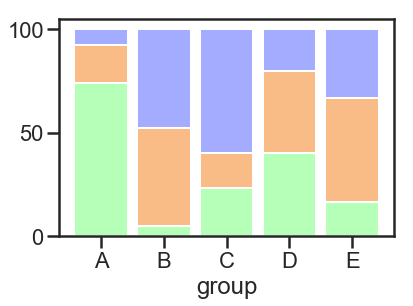

In [140]:
"""
    stacked 100% barplot - using LC to calculate everythin
    https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/
"""

# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()


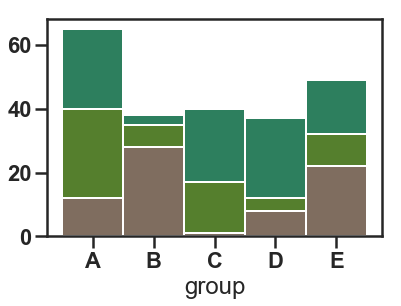

In [141]:

"""
    Simple stacked barplot 
"""

# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()


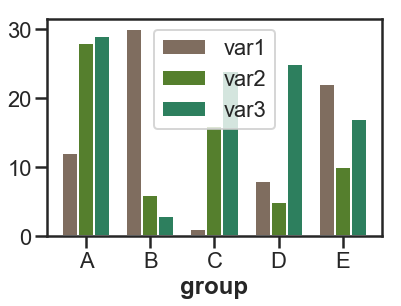

In [139]:
"""
    grouped barplot
"""
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


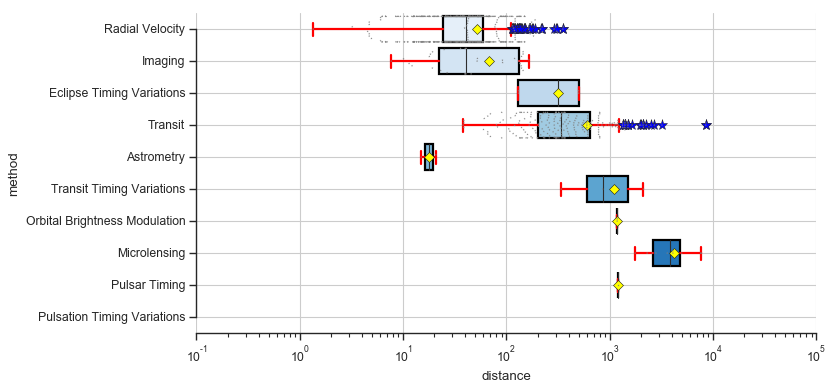

In [638]:
"""
    -------------------------------------------------------------------------------
    sns.boxplot()
    -------------------------------------------------------------------------------
    individual plot; ie. can be subplotted 
    
    *"data"
    - x,y, hue, data   : 
    - dodge.           : True - dodge boxes when hue is used for the same values
    - order,hue_order  : ....
    - showmeans        : True
    - orient.          : "h"/"v" - # orient is important, if you do not provide x,y, only data=
                         eg:  ax = sns.boxplot(data=iris, orient="h", palette="Set2")
    
    * lines
    - linewidth    : applied to boxes and wiskers,
    
    * box:
    - color.       : one color for all
    - palette.     : for each dataset
    - saturation.  : best dont touch, or set =1, in case of large pather it may be >1, 
    - notch.       : “notch” the box to indicate a confidence interval for the median
    
    * outliers
    - fliersize    : Size of the markers
    
    * wiskers
    - whis.        : Proportion of the IQR past the low and high quartiles to extend the plot whiskers
                     all points, outside will be outliers, typically whis=1.5
    
    * means
    showmeans      : True/False
    meanprops      : for markers
    
    ADDITIONAL PARAMS FROM plt.boxplot(); 
    https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html
    ...
    medianprops; boxprops, whiskerprops, meanprops, flierprops
    
    * PROBLEMS:
    its best to plot one boxplot at a time.
    if more is needed use plt.boxplot function, or use sns.Facetgrid approach    
    -------------------------------------------------------------------------------
"""

#style and data
sns.set(style='ticks', palette="pastel")
planets = sns.load_dataset("planets")

# Plot the orbital period of discovered planets
fig = plt.figure(figsize=(10, 5))
red_square     = dict(markerfacecolor='blue', marker='*', markersize=10)
green_diamond  = dict(markerfacecolor='yellow', marker='D')
red_wiskers    = dict(linewidth=2, color="red")
black_box      = dict(linewidth=2, edgecolor="black")

ax = sns.boxplot( y="method",x="distance", data=planets, 
  
                 # lines
                 linewidth=1,
                 
                 # box and median:
                 showbox=True, width=0.8, palette="Blues", saturation=1, notch=False, boxprops=black_box,
                
                 # wiskers
                 whis=1.5, whiskerprops=red_wiskers, showcaps=True, capprops=red_wiskers,
                 
                 # outliers
                 showfliers=True, flierprops=red_square,
                                        
                 # mean
                 showmeans=True, meanprops=green_diamond)

# Add in points to show each observation wiht each method
ax = sns.swarmplot(y="method",x="distance", data=planets,
               size=2, color="grey", linewidth=0, marker="*") # 

# ticks, axes and grid
ax.set_yticklabels(planets.method.unique(),rotation=0, ha="right")
ax.set_xscale("log")
ax.xaxis.grid(True); ax.yaxis.grid(True)

# remove spines you dont need
sns.despine(trim=True) # trim=T; spines do not touch each other

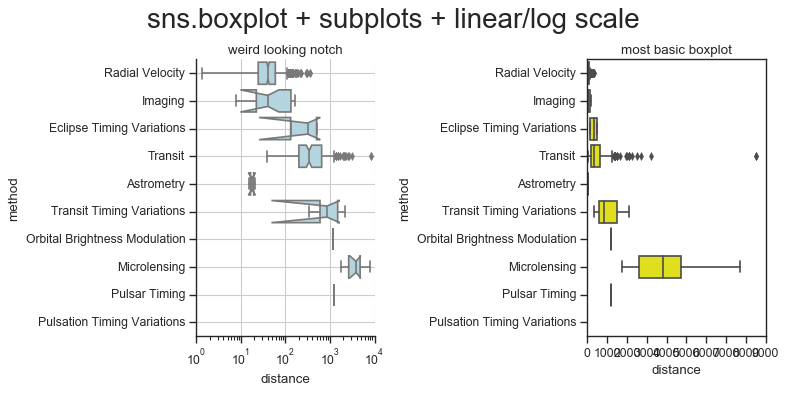

In [702]:
"""
    sns.boxplot() + subplot (not recommended)
"""
#style, data and figuresize
sns.set(style='ticks', palette="pastel")
planets = sns.load_dataset("planets")
fig = plt.figure(figsize=(10, 5))
fig.suptitle("sns.boxplot + subplots + linear/log scale", fontsize=25)

# two subplots
ax = fig.add_subplot(121)
sns.boxplot( y="method",x="distance", data=planets, color="lightblue", notch=True)
ax.set_xscale("log"); sns.despine(); ax.grid(); ax.set_title("weird looking notch")

ax = fig.add_subplot(122)
ax = sns.boxplot( y="method",x="distance", data=planets, color="yellow")
ax.set_xscale("linear"); ax.set_title("most basic boxplot")

# final adjustements
plt.tight_layout(); fig.subplots_adjust(top=0.85, hspace=0.4); plt.show();

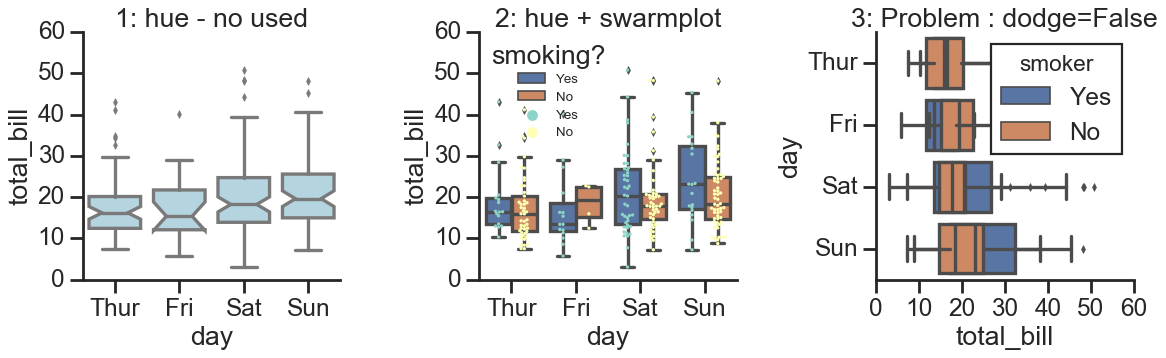

In [696]:
"""
    sns.boxplot() + hue + dodge + sns.swarmplot()
"""

# set, data, figure
sns.set(context="poster", style="ticks")
tips = sns.load_dataset("tips")
fig = plt.figure(figsize=(15,5))

# subplot 1
ax = fig.add_subplot(131)
ax = sns.boxplot(x="day", y="total_bill", data=tips, color="lightblue", notch=True); 
ax.set_title("1: hue - no used");sns.despine()

# subplot 2
ax = fig.add_subplot(132)
ax = sns.boxplot(x="day", y="total_bill", data=tips,hue="smoker"); 
ax = sns.swarmplot(x="day", y="total_bill", data=tips,hue="smoker", palette="Set3", dodge=True, size=3)
ax.set_title("2: hue + swarmplot");sns.despine()
ax.legend(scatterpoints=1, frameon=False, loc="best", labelspacing=0.4, fontsize=12, title="smoking?")

# subplot 3
ax = fig.add_subplot(133)
ax = sns.boxplot(y="day", x="total_bill", data=tips,hue="smoker",orient="h", dodge=False); 
ax.set_title("3: Problem : dodge=False");sns.despine() # orient is important, if you have no x,y, only data

# layout
plt.tight_layout()

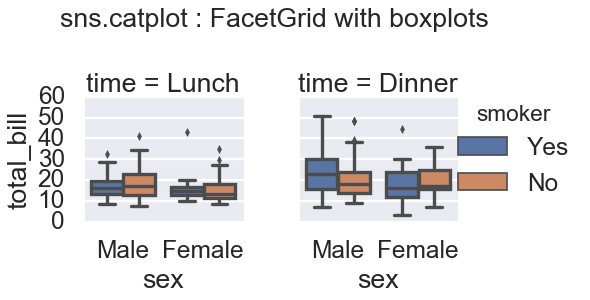

In [794]:
"""
    boxplot on sns.catplot()
    
    returns; FacetGrid
"""
sns.set(context="poster", style="darkgrid")
g = sns.catplot(x="sex", y="total_bill",data=tips, hue="smoker", 
                
                # how to divide inforastion on different plots acros grid column
                col="time",
                
                # plot type, and general info on layout
                kind="box", height=4, aspect=0.8, legend_out=True)
g.fig.suptitle("sns.catplot : FacetGrid with boxplots")
g.fig.subplots_adjust(top=0.7)

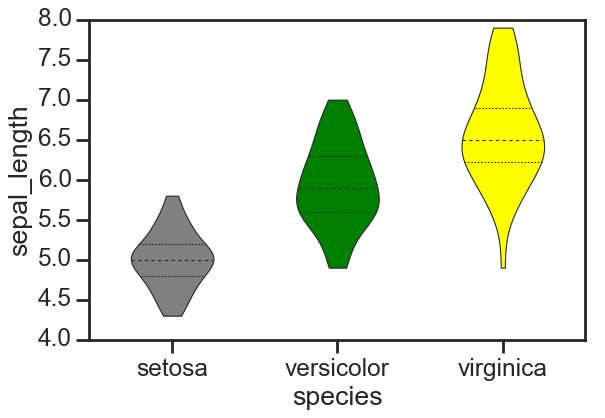

In [761]:
"""
    -------------------------------------------------------
    sns.violinplot
    -------------------------------------------------------
    For:
    - to show multiple distributions of data at once, grouped by categorical variable
    - unlike boxplot, violinplot features a kernel density estimation 
      of the underlying distribution.
      
    Pros:
    - pandas objects as inputs are preferable -> automatic axes annotation!
      
    Cons:
    - estimation procedure is influenced by the sample size
      : violins for small samples might look misleadingly smooth.
    -------------------------------------------------------
    * data:
    x,y,hue, data, order, hue_order : ....
    orient                          : “v” | “h”
    
    * violin shape:
    bw                  : {‘scott’, ‘silverman’, float}
                         scale factor to use when computing the kernel bandwidth
                         kernel size == scale_factor*sd in each bin
    cut                 : how far, above, and below the data violin will be calczlated/drawn
                         cut=0; it will stop violin on first,last datapoint
    scale               : {“area”, “count”, “width”} 
                        how to scale the width of each violin
                          - area  - each violin will have the same area
                          - count - number of observations in a given bin
                          - width - each violin will have the same width
                          
    scale_hue           : hue only, scale_hue=True: scalling withing each group, false, 
                          all violins treated as separate and equal.
    gridsize            : 0 - nothing, how many discrete points is used to czloate violin shape
                        higher number generate more smooth violin shape, stops at max nr of points
    
    * violi size/color ...
    width               : no hue : widht of each violin
                           + hue : widht of all violins grouped wiht major variable
    linewidth; color; palette; saturation                       
    
    * points
    inner.              : "box".           - miniature boxplot
                          "quartiles"      - quartiles of the distribution. 
                          "point"/"stick"  - show each underlying datapoint. 
                          None             - unadorned violins                         
    * hue, only
    dodge               : True/False
    split               : True/False; if True it will draw half of a violin for each level in each cvategory
                          to make it easier to directly compare the distributions
    scale_hue           : 
""";

# set, data, 
sns.set(context="poster", style="ticks")
iris = sns.load_dataset("iris")
fig = plt.figure(figsize=(8,5))

# plot
sns.violinplot(x="species", y="sepal_length", data=iris, 
               
               # violin shape
               bw="silverman", cut=0, scale="width",gridsize=50,
               
               # points/sticks, bells, etc, representation of points inside violin 
               # (best to not use it, have None, or "quantiles")
               inner="quartiles",
               
               # violin aestetics and plotting
               width= 0.5, palette=["grey", "green","yellow"],linewidth=1,saturation=1)

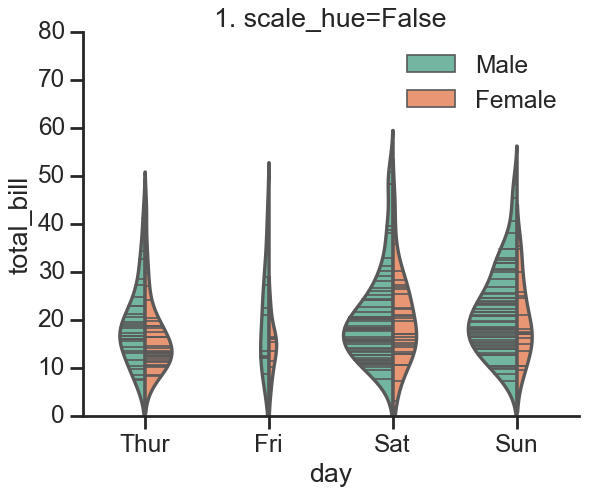

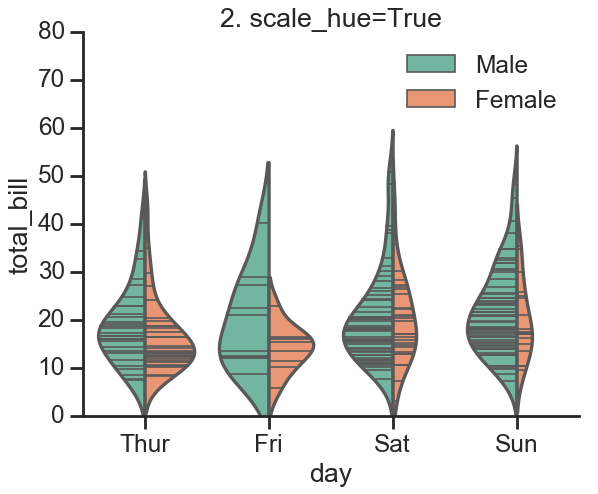

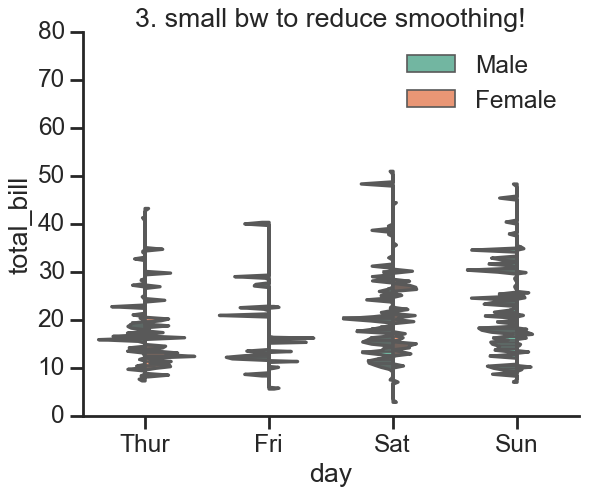

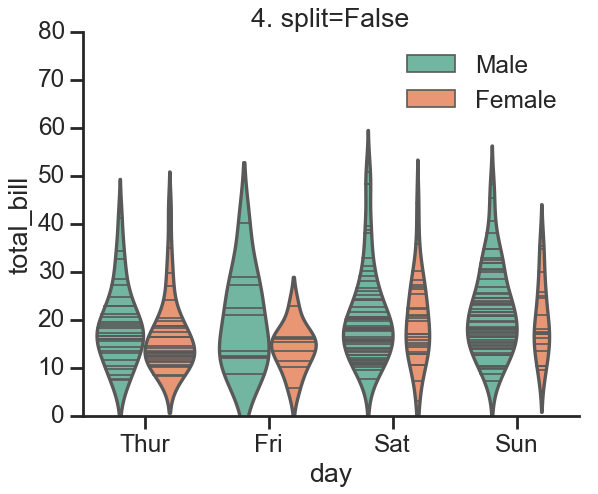

In [788]:
tips = sns.load_dataset("tips")

# scale_hue=True
ax = sns.violinplot(x="day", y="total_bill", hue="sex",data=tips, palette="Set2",
                    split=True, scale="count",inner="stick",scale_hue=False)
ax.set_title("1. scale_hue=False")
sns.despine(), ax.legend(frameon=False), ax.set_ylim(0,80);plt.show()

# scale_hue=True
ax = sns.violinplot(x="day", y="total_bill", hue="sex",data=tips, palette="Set2",
                    split=True, scale="count",inner="stick",scale_hue=True)
ax.set_title("2. scale_hue=True")
sns.despine(), ax.legend(frameon=False), ax.set_ylim(0,80);plt.show()


# small bw to reduce smoothing!
ax = sns.violinplot(x="day", y="total_bill", hue="sex",data=tips, palette="Set2",
                    split=True, scale="count",inner="stick",scale_hue=True, bw=0.01)
ax.set_title("3. small bw to reduce smoothing!")
sns.despine(), ax.legend(frameon=False), ax.set_ylim(0,80);plt.show()


# small bw to reduce smoothing!
ax = sns.violinplot(x="day", y="total_bill", hue="sex",data=tips, palette="Set2",
                    split=False, scale="count",inner="stick",scale_hue=True)
ax.set_title("4. split=False")
sns.despine(), ax.legend(frameon=False), ax.set_ylim(0,80);plt.show()

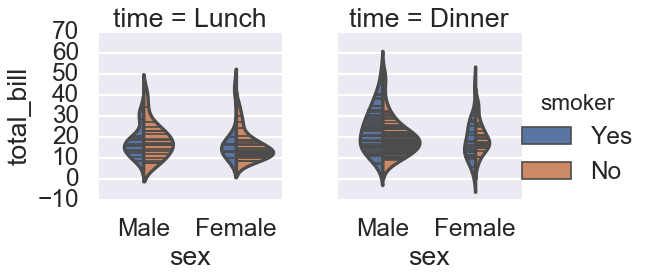

In [805]:
"""
   sns.catplot() with violinplot 
   
   aspect    : good 0.7-1: = plot width/ plot height
"""
g = sns.catplot(    x="sex", y="total_bill", data=tips,hue="smoker", 
                
                    # col : how the data will be divided into different plots, acros grid columns
                    col="time",
                
                    # kind; + split,bw, ... params form sns.violinplot(), can be all!
                    kind="violin", split=True, bw=0.5, scale="count",inner="stick",scale_hue=False,
                
                    # plot size, aspect (width/hight)
                    height=4, aspect=.9);

In [ ]:
"""
    sns.swarmplot() & sns.stripplot()

    * DATA:
    - x, y, hue, data, order, hue_order, dodge, orient, 
    
    * MARKERS
    - color/palette, size(like in plt.scatter), edgecolor, linewidth, alpha, marker, size, 
    
    * ONLY IN STRIPPLOT
    - jitter    : Amount of jitter (only along the categorical axis) : 
                  [0-1]; i.e how wide the dataset will be on each category
                  ....
                  - useful when you have many points and they overlap - easier to see distribusion
                  - True : for a good default
                  - or keep it relatively small (~0.1), 
                       or else, points from different sets will merge in a messy plot
"""

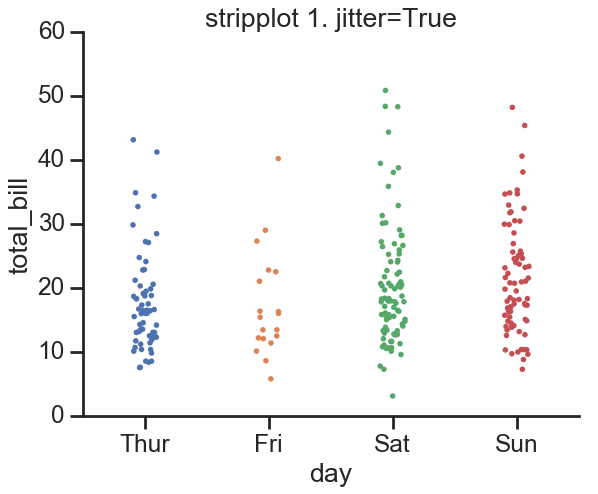

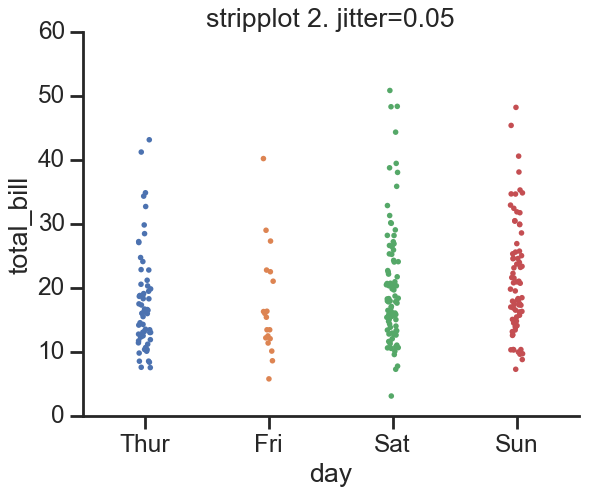

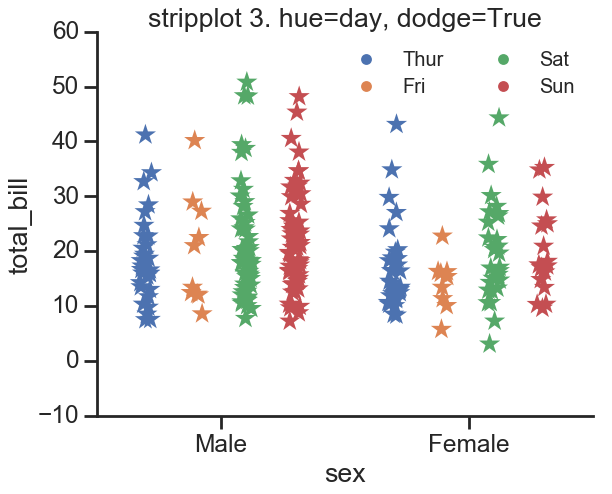

In [841]:
# data
sns.set(context="poster", style="ticks")
tips = sns.load_dataset("tips")

# plot 1
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("stripplot 1. jitter=True"); sns.despine(); plt.show();

# plot 2
sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)
plt.title("stripplot 2. jitter=0.05"); sns.despine(); plt.show();

# hue, dodge=True
ax = sns.stripplot(x="sex", y="total_bill", hue="day", data=tips, 
                   jitter=True, dodge =True, marker="*", size=20)
ax.legend(scatterpoints=1, frameon=False, loc="best", labelspacing=0.4, 
          fontsize=18, ncol=2)
plt.title("stripplot 3. hue=day, dodge=True"); sns.despine(); plt.show();


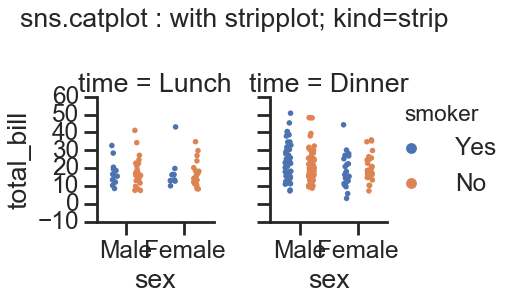

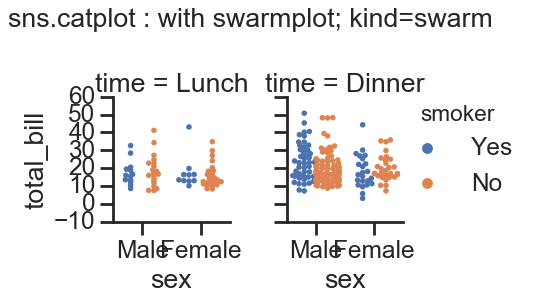

In [851]:
"""
    sns.stripplot() with sns.catplot()
"""
# stripplot
g = sns.catplot(x="sex", y="total_bill",
                    hue="smoker", col="time",
                    data=tips, kind="strip",dodge=True,
                    jitter=True,
                    height=4, aspect=.7);
g.fig.suptitle("sns.catplot : with stripplot; kind=strip")
g.fig.subplots_adjust(top=0.7); plt.show();

# swarmplot
g = sns.catplot(x="sex", y="total_bill",
                    hue="smoker", col="time",
                    data=tips, kind="swarm",dodge=True,
                    height=4, aspect=.7);
g.fig.suptitle("sns.catplot : with swarmplot; kind=swarm")
g.fig.subplots_adjust(top=0.7); plt.show()

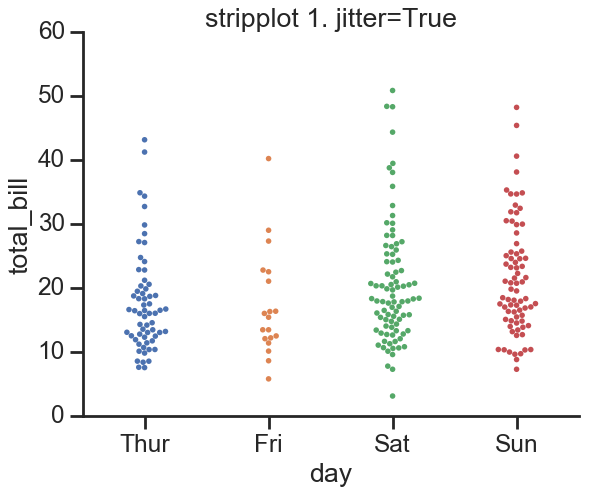

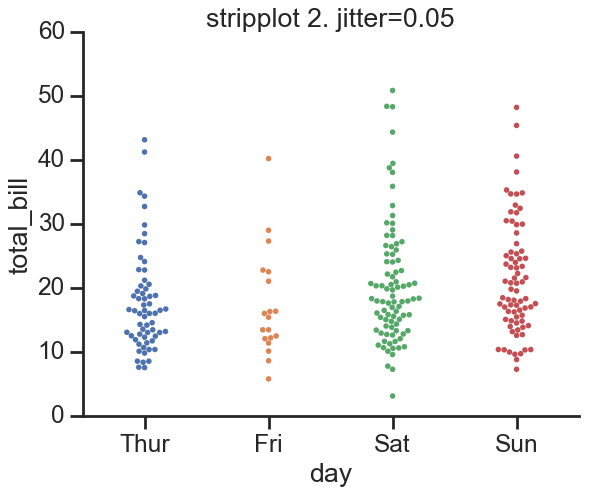

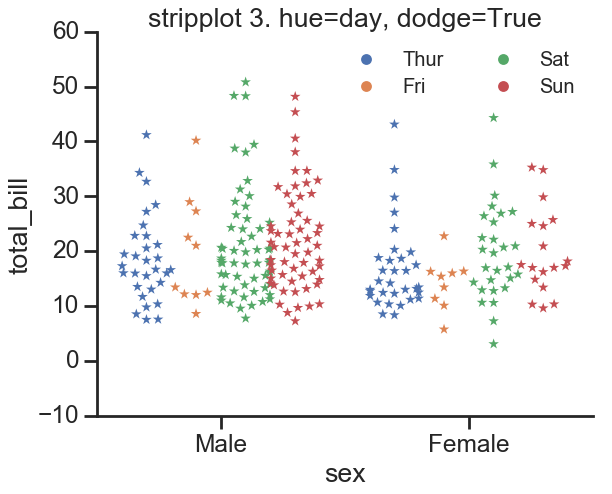

In [840]:
# data
sns.set(context="poster", style="ticks")
tips = sns.load_dataset("tips")

# plot 1
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("swarmplot 1. jitter=True"); sns.despine(); plt.show();

# plot 2
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("swarmplot 2. jitter=0.05"); sns.despine(); plt.show();

# hue, dodge=True
ax = sns.swarmplot(x="sex", y="total_bill", hue="day", data=tips, 
                   dodge =True, marker="*", size=10)
ax.legend(scatterpoints=1, frameon=False, loc="best", labelspacing=0.4, 
          fontsize=18, ncol=2)
plt.title("swarmplot 3. hue=day, dodge=True"); sns.despine(); plt.show();

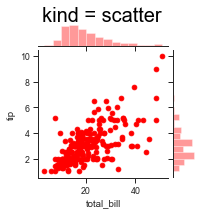

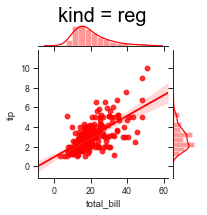

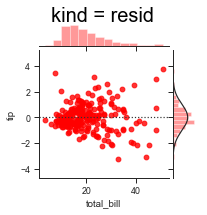

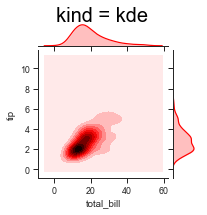

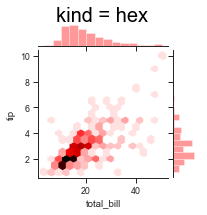

In [2]:
"""
    sns.jointplot(); 
        * for.         : comparing two distribusions, no hue!
                         https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid
                         by convention : g = sns.jointplot(...)
        * returns      : JointGrid
        * input
         - x,y, data, 
         - dropna      : True/False 
        
        * plot settings
         - kind = {“scatter” | “reg” | “resid” | “kde” | “hex”}
         - colo; {x, y}lim, 
         - height      : alwys height==width
         - ratio       : eg. 2x1, join plot height == 2x marginal plots height ) 
         - space       : space between plots  
        
        * joint_kws;    
         - 
         
        * marginal_kws = dict(): same parameters as given to a sns.displot()
"""
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
tips = sns.load_dataset("tips")

# jointplot of each kind
sns.set(context="paper", style="ticks")
plot_types = ["scatter" , "reg" , "resid" , "kde" , "hex"]
for i,p in enumerate(plot_types):
    g = sns.jointplot( x="total_bill", y="tip", data=tips, 
                       kind=p, height=3, color="red")
    g.fig.suptitle(f"kind = {p}", ha="center", fontsize=20, color="black", zorder=100);
    g.fig.subplots_adjust(top=0.9); 
plt.show()

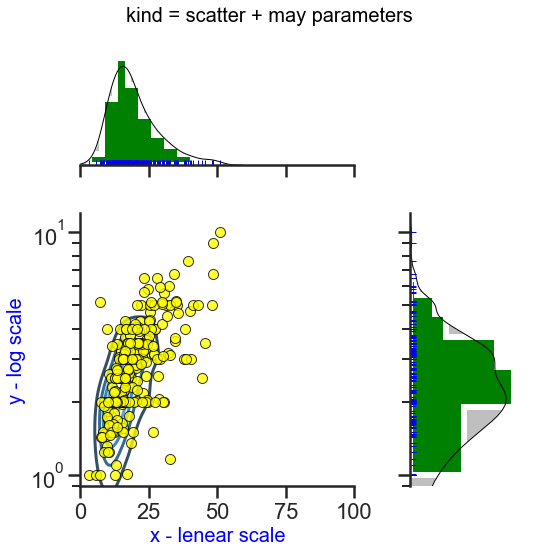

In [33]:
"""
    sns.jointplot()
"""

#### SETTINGS ####
sns.set(context="poster", style="ticks")


#### JOINTPLOT ####
g = sns.jointplot( x="total_bill", y="tip", data=tips, 
                   
                   # general plot settings
                   kind="scatter", color="red", height=8,ratio=2, space =0, xlim=(0,100),ylim=(0.9, 12),
                  
                   # sns.displot(): TOP/LEFT subplots
                   marginal_kws = dict(bins=10, color="blue",label="",
                                       kde=True, norm_hist=True, hist=True, rug=True, 
                                    hist_kws ={"histtype": "stepfilled", "lw": 6, "alpha": 1, "color": "green"},
                                    rug_kws  ={"color": "blue"},
                                    kde_kws  ={"color": "black", "lw": 1, "label": "KDE", "label":"","shade":True}
                                       ),
                  
                   # sns.scatterplot():  CENTER
                   #.   a) params, taken by a joninplot(), but speciffic to a kind of plot, eg, "scatter"
                   #    b) joint_kws={'gridsize':100, 'bins':'log', 'xscale':'log', 'yscale':'log'}
                   s=100, edgecolor="black", linewidth=1, facecolor="yellow", alpha=0.8,

                   # annotation : only when annotatign some text on plot 
                   #.      annot_kws=dict(stat="r") 
                 )


#### ADDITIONAL PLOTS ####
g.plot_joint(sns.kdeplot, zorder=0, n_levels=5, cmap="Blues_d") 
#      kdeplot(color/cmap/palette)


#### AXES #####
g.set_axis_labels("x - lenear scale", "y - log scale", fontsize=20, color="blue")
g.ax_joint.set_xscale('linear')
g.ax_joint.set_yscale('log')


#### LAYOUT ####
g.fig.suptitle(f"kind = scatter + may parameters", ha="center", fontsize=20, color="black", zorder=100);
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9); 
plt.show();

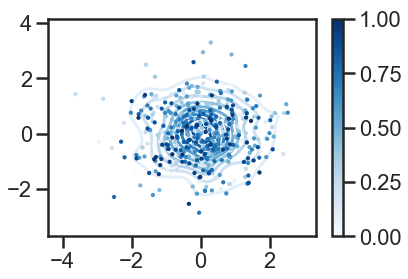

In [29]:
"""
    USING SNS COLOR PALETTE AS PLT CMAP !
"""

from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette("Blues_d", n_colors=10).as_hex())
kde_cmap = ListedColormap(sns.color_palette("Reds", n_colors=10).as_hex())

N = 500
data1 = np.random.randn(N)
data2 = np.random.randn(N)
colors = np.linspace(0,1,N)
plt.scatter(data1, data2, c=colors,s=5, cmap="Blues")
sns.kdeplot(data1, data2, cmap="Blues", zorder=0)
plt.colorbar()
plt.show()

In [15]:
ListedColormap(sns.color_palette("Blues_d", n_colors=10).as_hex())

NameError: name 'ListedColormap' is not defined

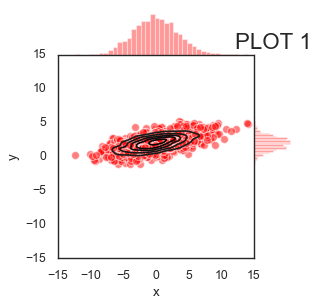

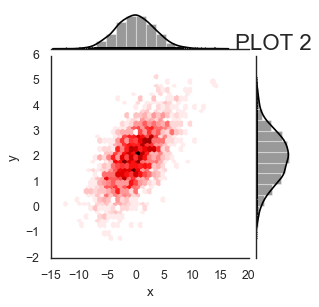

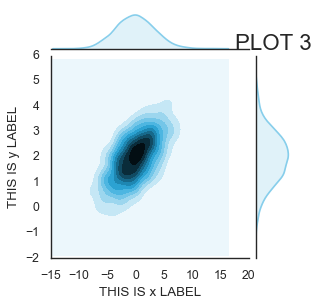

In [381]:
"""
    sns.jointplot();        
"""
# ------------------------------------------------------------------------------------------------
# PARAMETERS:
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }, optional
# height : Size of the figure (it will be square).
# ratio : how many times the plot in the middle is bigger from the histograms, min value == 1
# space : spoace between middle plot and histograms
# dropna : True/False
# marginal_kws = dict(): same parameters as given to a sns.displot()

# data and style
import seaborn as sns
data = np.random.multivariate_normal([0, 2], [[11, 2], [2, 1]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
sns.set(style="white", color_codes=True)

# ------------------------------------------------------------------------------------------------

# PLOT 1
# Draw a scatterplot, then add a joint density estimate:
g1 = sns.jointplot("x", "y", data, 
                   height=4, ratio=5, space=0, xlim=(-15, 15), ylim=(-15, 15),
                   kind='scatter', s=50, color='red', edgecolor="white", linewidth=1, alpha=0.5)
plt.title("PLOT 1", ha="center", fontsize=20) # must be bnefore additional plot !!
g1 = g1.plot_joint(sns.kdeplot, zorder=10, n_levels=5, color="black") # special function to add another plot to a grid.# g1 = g1.ax_marg_x.hist(data["x"], color="black") # add one mor3 histogram to x axis!
g1
# annotate with some usefull info on the data
#from scipy import stats 
#g1 = g1.annotate(stats.pearsonr)

# ------------------------------------------------------------------------------------------------

# PLOT 2
# Pass keyword arguments down to the underlying plots:
g2 = sns.jointplot("x", "y", data, kind='hex',color="red",height=4, ratio=5,
             marginal_kws=dict(bins=15, rug=True, kde=True, color="black"),                   
             annot_kws=dict(stat="r"))
plt.title("PLOT 2", ha="center", fontsize=20)
g2;

# ------------------------------------------------------------------------------------------------

# PLOT 3
# set axis labels
g3 = sns.jointplot("x", "y", data, kind='kde', color="skyblue",height=4, ratio=5)
g3.set_axis_labels("THIS IS x LABEL", "THIS IS y LABEL")
plt.title("PLOT 3", ha="center", fontsize=20)
g3;




In [22]:
"""
    new axis in action
"""

import numpy as np

a1 = np.linspace(1,4,4) # array([1., 2., 3., 4.])
a2 = np.linspace(11,14,4) # array([11., 12., 13., 14.])

# broadcast

# -1-
a1*a2 # array([11., 24., 39., 56.])

# -2-
a1 * a2[np.newaxis, :] # array([[11., 24., 39., 56.]])

# -3-
a1 * a2[:, np.newaxis] # here a2 is treated as array(1x4), 
#.                       broadcasted to (4x4), by copying the first row
#array([[11., 22., 33., 44.],
#       [12., 24., 36., 48.],
#       [13., 26., 39., 52.],
#       [14., 28., 42., 56.]])

array([[11., 22., 33., 44.],
       [12., 24., 36., 48.],
       [13., 26., 39., 52.],
       [14., 28., 42., 56.]])

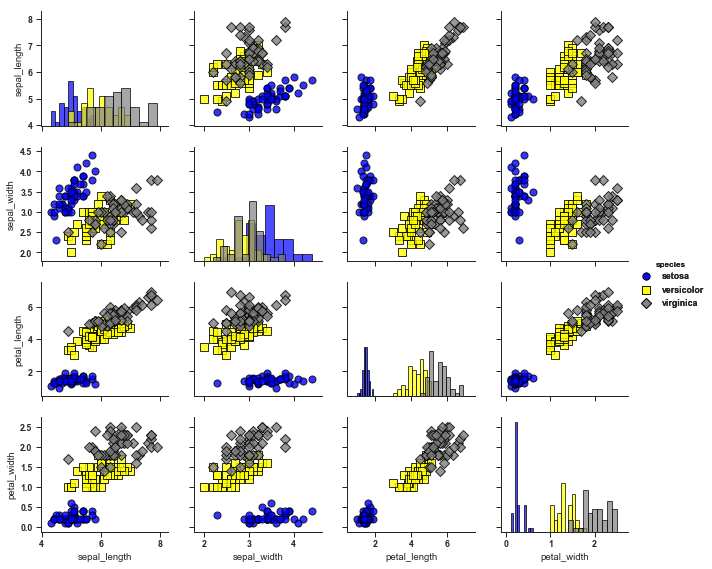

In [164]:
"""
    -----------------------------------------------
    Pair plot
    -----------------------------------------------
    - to visualise multidimensional datasets
    https://www.youtube.com/watch?v=cpZExlOKFH4&t=260s
    https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
    # joint distribusions - scatterplots
    # marginal distribusions - histograms/kde plots
 
    # --------------------------------------------
    # RETURNS
     - PairGrid         : https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid
 
    # INPUT
     - data             :  pd.DataFrame()
                           Tidy (long-form) df where each column is a var and each row is an observation 
                           sns.pariplot, takes df, and uses all columns wiht numerical values 
                           to make square grid with plots
     - hue              :  to map plot aspects to different colors
     - hue_order        :  list of strings, wiht hue categories,
     - vars             :  list of variables ("colnames" in df) to use
     - {x, y}_vars      :  same as vars, but separately for rows(y), and columns (x)
     - dropna           :  ...

    # POINT/HUE AESTETICS
     - palette          :  dict with hue categories, or sns color palette, 
                           eg: dict(cat1="blue", cat2="red")  
     - markers          :  single matplotlib marker code or list
                           if list: nr of markers == nr of levels in the hue var.
                          
    # PLOT PARAMTERES
     - height           : size of each plot, in inches 
     - aspect           : Aspect *height gives the width (in inches) of each facet

    # --------------------------------------------

    * PLOT TYPES
     - kind                   : {‘scatter’, ‘reg’}; 
                                 Kind of plot for the non-identity relationships
     - diag_kind              : {‘auto’, ‘hist’, ‘kde’},; 
                                 marginal distribusions; Kind of plot for the diagonal subplots
     - {plot, diag, grid}_kws : dicts, for each item

    # PLOT KIND AESTETICS
     - plot_kws               : args from, "scatter" or "reg" plots in sns
     - diag_kws               : args from, ‘hist’or ‘kde’
     -----------------------------------------------
"""

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# data
iris = sns.load_dataset("iris")
iris.head()

# plot settings
sns.set_context("paper")
sns.set_style("ticks") # {darkgrid, whitegrid, dark, white, ticks}

# pairplot
# sns.pairplot(iris, hue='species', height=2.5) # very basic
g = sns.pairplot(
                 # INPUT
                 data=iris, hue="species", 

                 # POINT/HUE AESTETICS 
                 #palette ="blue",
                 palette = {"setosa":"blue","versicolor":"yellow","virginica":"grey","gluon":"black"},
                 markers = ["o", "s", "D"],    

                 # PLOT SETTINGS
                 height =2, aspect =1,

                 # ----------------------------------- 
                
                 # PLOT TYPES
                 diag_kind = "hist",
                 kind = "scatter", 
                 
                 # PLOT TYPES AESTETICS
                 diag_kws = {"histtype":"bar", "edgecolor":"black", "linewidth":1, "alpha":0.7},
                 plot_kws = {"s":50, "edgecolor":"black","linewidth":1,"alpha":0.8}
                );

# LEGEND
g = g.add_legend()

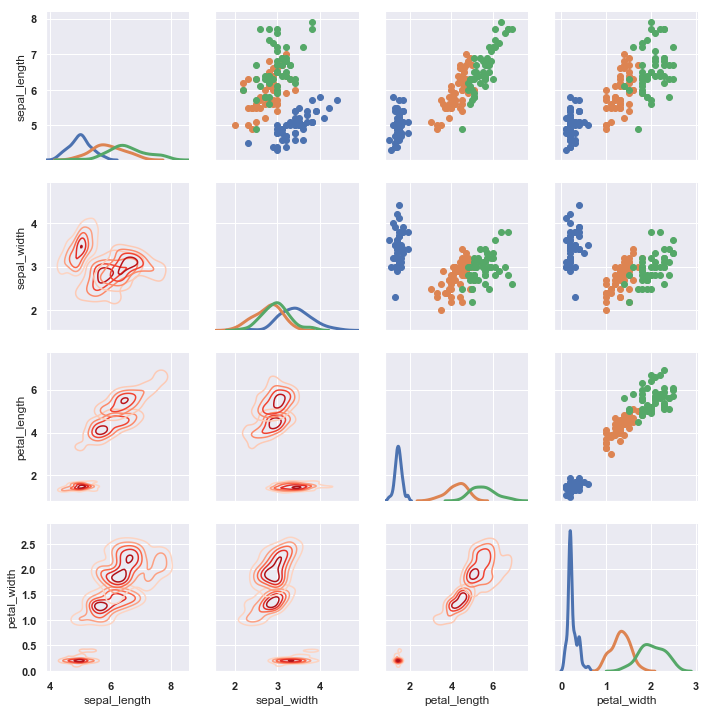

In [179]:
"""
    differet type of plots on pair plot
"""
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)      # hue - automatically assigned
g = g.map_upper(plt.scatter)                         # hue - automatically assigned
g = g.map_lower(sns.kdeplot,n_levels=5, cmap="Reds") # No HUE available for kde plot!

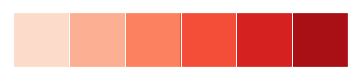

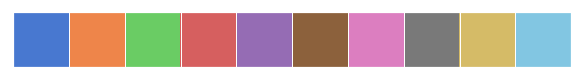

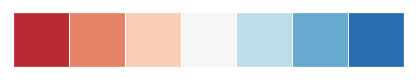

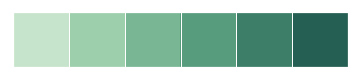

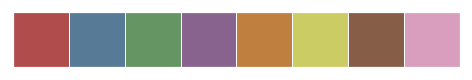

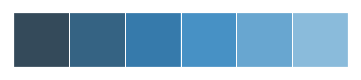

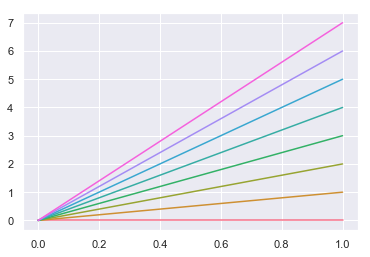

In [123]:
"""
    current color palette
"""
sns.palplot(sns.color_palette())                              # 1
sns.palplot(sns.color_palette("muted"))                       # 2
sns.palplot(sns.color_palette("RdBu", n_colors=7))            # 3  
sns.palplot(sns.color_palette("ch:2.5,-.2,dark=.3"))          # 4
sns.palplot(sns.color_palette("Set1", n_colors=8, desat=.5))  # 5
sns.palplot(sns.color_palette("Blues_d"))                     # 6  
plt.show();

with sns.color_palette("husl", 8):
    _ = plt.plot(np.c_[np.zeros(8), np.arange(8)].T)          # 7

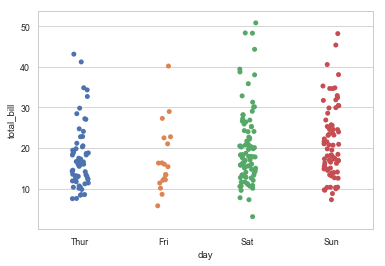

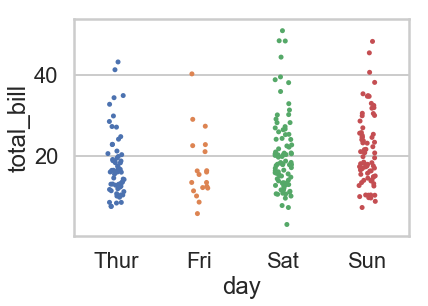

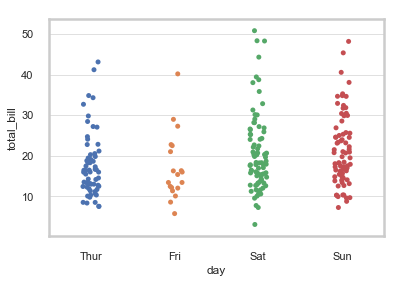

In [170]:
"""
    SCALE THE FIGURE

    * sns.set_context()      
      -     context          : dict, None, or one of {paper, notebook, talk, poster}
                               In order of relative size they are: paper, notebook, talk, and poster. 
                               The notebook style is the default.
      -     font_scale       : scaling factor to independently scale the size of the font el's
      -     rc ={ }          : running code; 
                               override the values in the preset seaborn context dictionaries!!!
      -    sns.set_context() ; and see all options that you may alter with rc, plus the current settings
      -    sns.set()         ; reverse mess you made
"""

# data; sns.get_dataset_names()
tips = sns.load_dataset("tips")

# style
sns.set_style("whitegrid")

# Smallest context:
sns.set_context("paper")
sns.stripplot(x="day", y="total_bill", data=tips)
plt.show()

# Largest Context:
sns.set_context("poster")
sns.stripplot(x="day", y="total_bill", data=tips)
plt.show()

# Set font scale and reduce grid line width to match
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.stripplot(x="day", y="total_bill", data=tips)
plt.show()

# see all options
# sns.plotting_context()

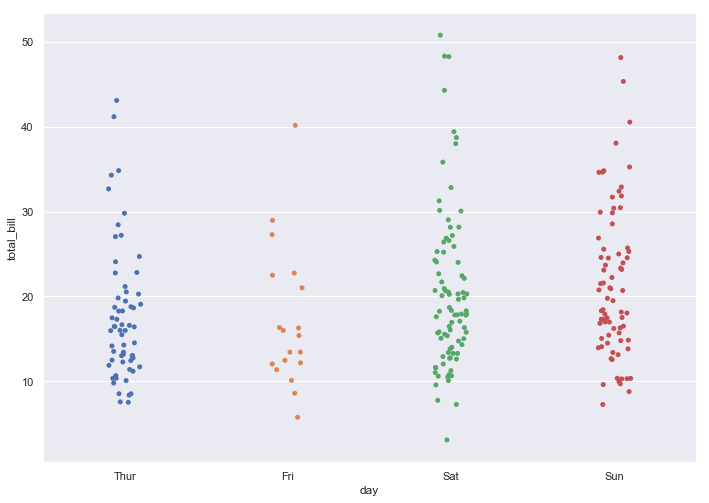

In [177]:
"""
    FIGURE SIZE IN SEABORN
"""

# figure size in inches
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27 # A4 in inches

# or 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot
tips = sns.load_dataset("tips")
sns.stripplot(x="day", y="total_bill", data=tips)

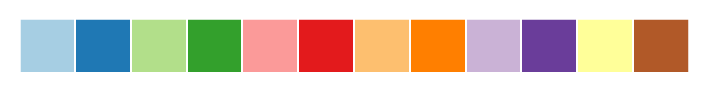

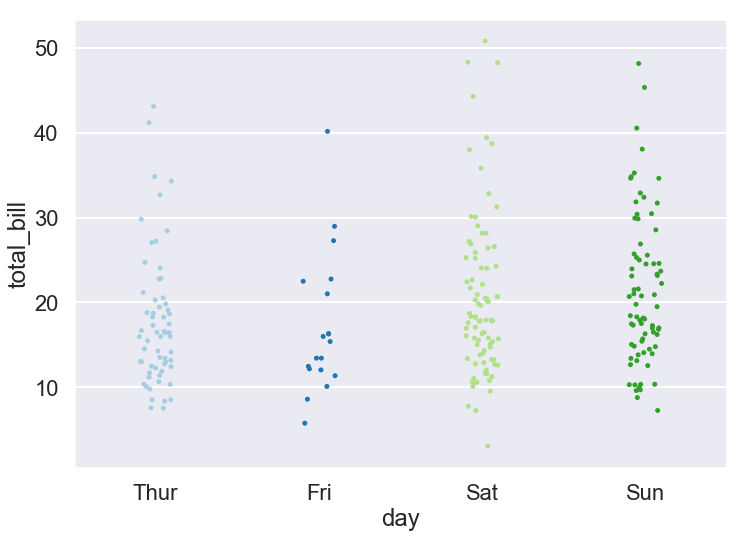

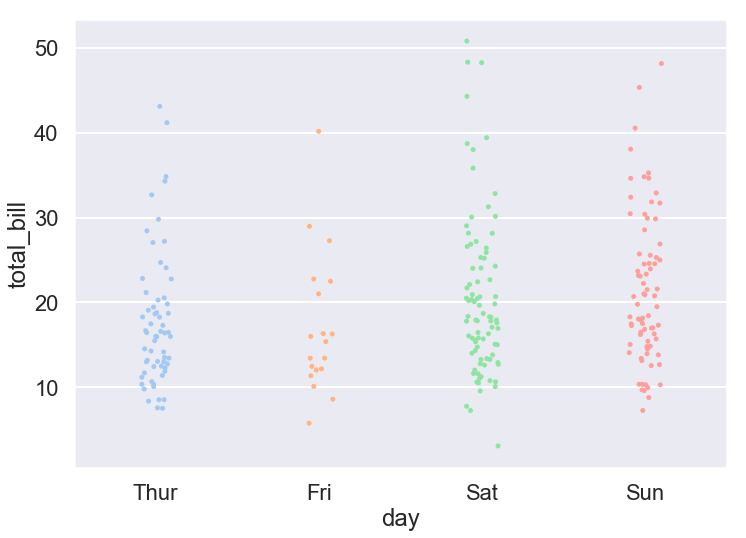

In [334]:
"""
    COLOR PALETTE
    * links                  : https://seaborn.pydata.org/tutorial/color_palettes.html
    * sns.set_palette()      : set up color palette for plots
    * sns.color_palette()    : to build color palette, or to see curent one
             takes             a) sns built-in palettes
                               b) list of colors in Matplotlib format, 
                                  (RGB tuples, hex color codes, or HTML color names)
    * sns.palplot()          - to quickly visualize color palette
"""

# check current palette
sns.palplot(sns.color_palette()); plt.show();

# set one palette as default
sns.set_context("poster") # big letters
sns.set_palette("Paired") # set palette
sns.stripplot(x="day", y="total_bill", data=tips);plt.show()

# temporarly use color palette
with sns.color_palette("pastel"):
    sns.stripplot(x="day", y="total_bill", data=tips);


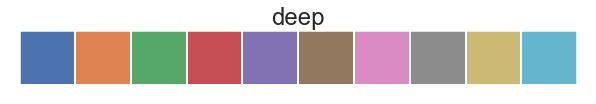

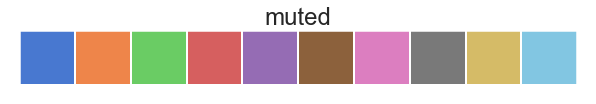

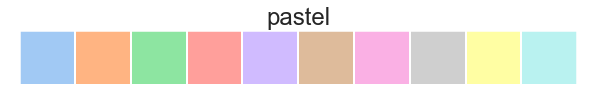

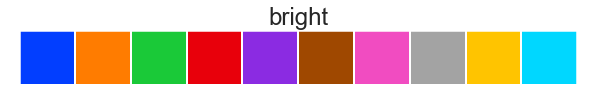

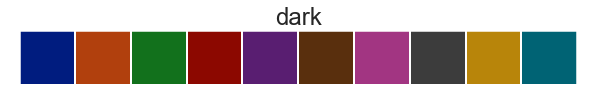

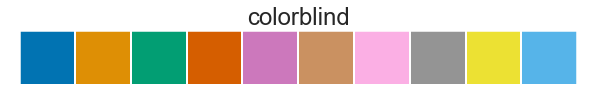

In [335]:
"""
    DEFAULT COLOR PALETTE
      has six variants of brightness and color saturation
"""
palettes = ["deep", "muted", "pastel", "bright", "dark", "colorblind"]
sns.set_context("poster") # big letters
for i, p in enumerate(palettes):
    sns.palplot(sns.color_palette(palettes[i]))
    plt.title(p)

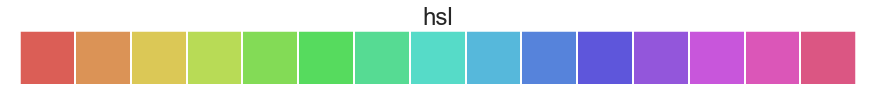

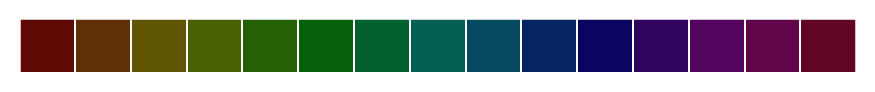

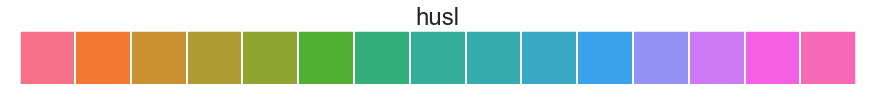

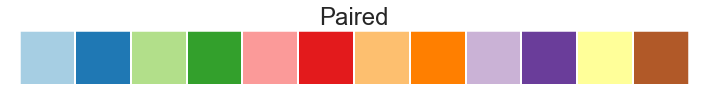

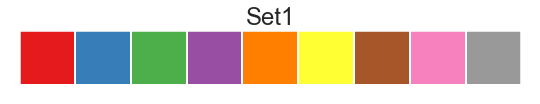

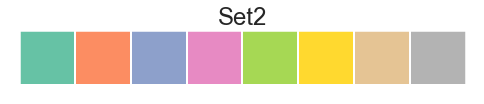

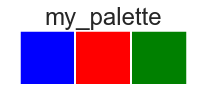

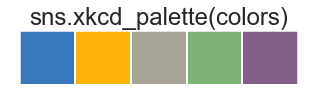

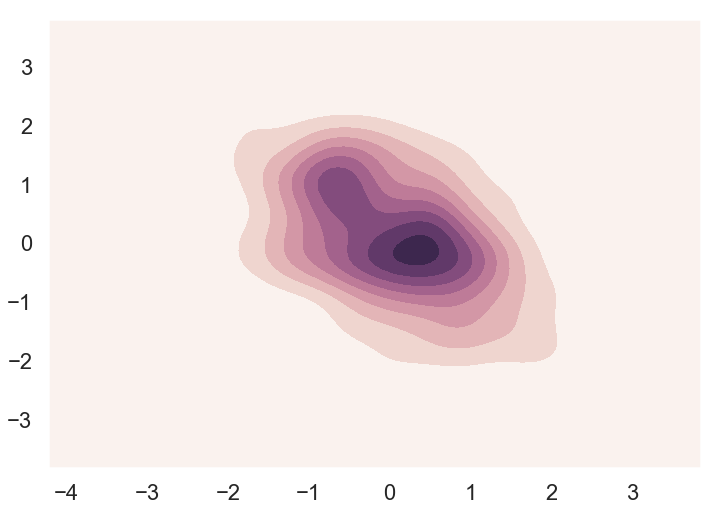

In [339]:
"""
    CATEGORICAL DATA

    "hls"              : colors from across RGB specrtum at equal dist and saturation
    sns.hls_palette()  : lightness and saturation of the colors
    "husl"             : special palette that adapts colors brighthnges and saturation
                         so they look similar to human eye, otherwise yellow and green 
                         will always look brighter   
"""

### nice palettes

# "hls", unlimited nr of colors
sns.palplot(sns.color_palette("hls", 15)); plt.title("hsl")
sns.palplot(sns.hls_palette(15, l=.2, s=.9)) # l : lighnes, s :  saturation

# "husl", unlimited nr of colors
sns.palplot(sns.color_palette("husl", 15)); plt.title("husl")

# 8-10 colors only, that will repeat 
sns.palplot(sns.color_palette("Paired")); plt.title("Paired")
sns.palplot(sns.color_palette("Set1")); plt.title("Set1") # 8 colors
sns.palplot(sns.color_palette("Set2")); plt.title("Set2") # 8 colors


### custom categorical palettes ###

# fully custom
my_palette = ["blue","red","green"]
sns.palplot(sns.color_palette(my_palette)); plt.title("my_palette")

# xkcd_palette(); 954 RGB colors, https://xkcd.com/color/rgb/
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors)); plt.title("sns.xkcd_palette(colors)")
plt.show()
# plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3) if you wish to use that code in plt.

# sns palette as cmap; 
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True) # chnages the output into cmap
sns.kdeplot(x, y, cmap=cmap, shade=True);

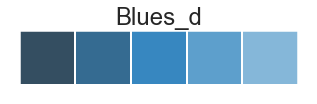

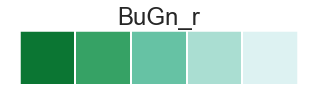

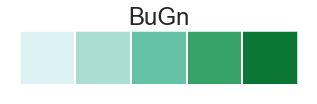

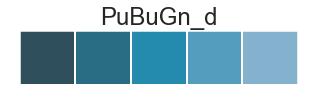

Text(0.5, 1.0, 'cubehelix - selected')

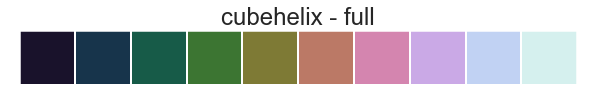

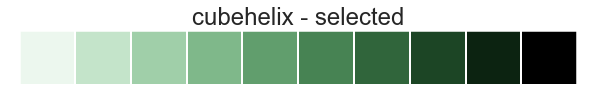

In [337]:
"""
   Sequential color palettes    
   * _r   : reverse color order !
   * _d  : dark palettes
"""

# often used
seq_color_palettes = ["Blues_d","BuGn_r","BuGn","PuBuGn_d"]
for i,p in enumerate(seq_color_palettes):
    sns.palplot(sns.color_palette(p,5)); 
    plt.title(p)
    plt.show();


# cubehelix; well visible in black-white print outs!!
sns.palplot(sns.color_palette("cubehelix", 10)); plt.title("cubehelix - full")
sns.palplot(sns.cubehelix_palette(10, start=2, rot=0, dark=0, light=.95, reverse=False)); 
plt.title("cubehelix - selected")
#.  start   : (a value between 0 and 3) 
#.  rot,    : nr of rotations (an arbitrary value, from -1 to 1)
#.  light   : lighnes 0-1
#   reverse : if False, palette starts at light colors

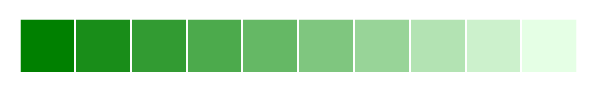

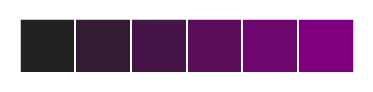

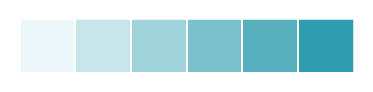

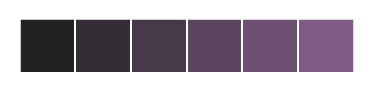

In [338]:
"""
   Custom Sequential palettes  

      light_palette();   choose_light_palette() 
      dark_palette();    choose_dark_palette() 
"""

#  Based on one color:
sns.palplot(sns.light_palette("green", n_colors=10, reverse=True,as_cmap=False))
sns.palplot(sns.dark_palette("purple"))

# other inputs {‘rgb’, ‘hls’, ‘husl’, xkcd’}
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

# used in example
# pal = sns.dark_palette("palegreen", as_cmap=True)
# sns.kdeplot(x, y, cmap=pal);

Text(0.5, 1.0, 'center=dark; large sep')

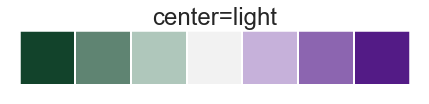

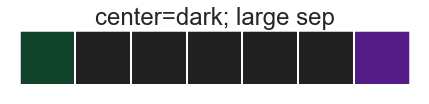

In [328]:
"""
   Custom Divergent palettes  
   https://seaborn.pydata.org/tutorial/color_palettes.html
   
   Based on two colors from huls color system:
      diverging_palette()         ; choose_diverging_palette()
          h_neg, h_pos            : colors; float in [0, 359]; neg. and pos. extents of the map.
          s                       : saturation, [0, 100], 0 == black&white
          l                       : lightness, [0, 100],
          n                       : number of colors
          center.                 : {“light”, “dark”}
          as_cmap                 : bool
          sep                     : sep. between the two ramps in the middle region of the palette
                                  : if high you have only pos and neg colors at the ends
 
"""

sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7, sep=20, center="light")); 
plt.title("center=light")

sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7, sep=200, center="dark")); 
plt.title("center=dark; large sep")



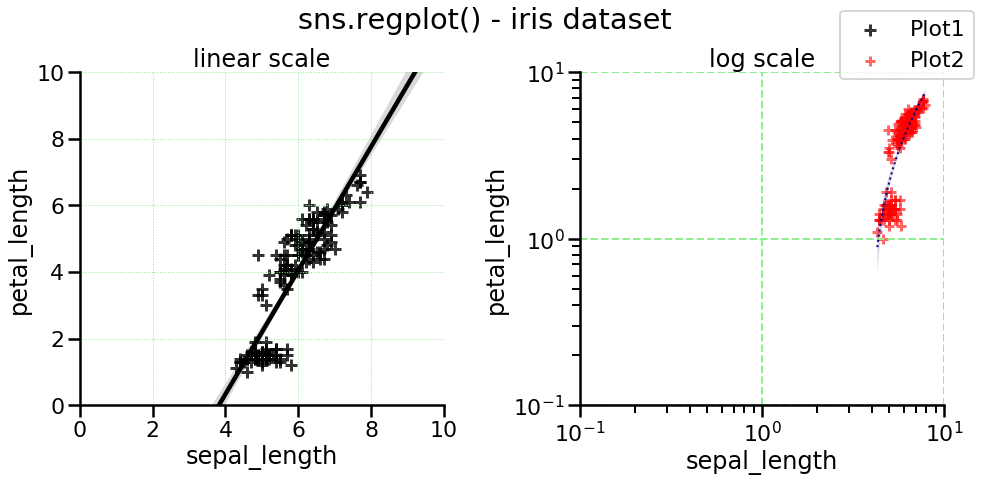

In [149]:
"""
    ---------------------------------------------------------------------------------------------------------
    sns.regplot()
    ---------------------------------------------------------------------------------------------------------
    
    1. main parameters:   
    {scatter,line}_kws : keyword arg's from plt.scatter and plt.plot.
    truncate           : line drawn only withing datalimits
    marker             : "."=point, ","=pixel, "v"/"^"/">"/"<"=triangle down/up..., "o"=circle, "s"=suqre,
                         "p"=pentagon, "+", "x", "*", "_", "|", "h"/"H"=two types of hexagons
                         "X"=x filled, arial black, "D"=diamond
                         https://matplotlib.org/3.1.1/api/markers_api.html
    
    2. Several options for model fitting:

    a) Confidence interval 
       ci                 : confidence interval: ranslucent bands around the regression line
                            {int in [0, 100] or None}, estimated using a bootstrap,
                            not addvised wiht larg datasets, thus set up to None.
       x_ci               : {“ci”, “sd”, int in [0, 100] or None}
                            conf.interval for discrete values of x,  If "sd", skip bootstrapping (faster!)
    
    b) to be drawn    
       scatter            : True/False
       fit_reg            : If False, no line is drawn

    c) models  
       order              : int, if >1, use numpy.polyfit to estimate a polynomial regression.
       logistic           : If True, assume that y is a bin. var. and use statsmodels to estim log regr. model. 
                            CAUTION: it is more computationally intensive than linear regr.
                            thus, decrease the nr of bootstrap resamples (n_boot) or set ci to None.                 
       lowess             : If True, nonparametric lowess model (locally weighted linear regression). 
                            CAUTION: onfidence intervals cannot currently be drawn for this kind of model.
       robust             : If True, obust regression. This will de-weight outliers. 
                            CAUTION: it is more computationally intensive than linear regr.
                           thus, use the same stenp as in log. regr   
       logx               : If True, linear regression of the form y ~ log(x), 
                           IMPORTANT : plot the scatterplot and regression model in the input space. 
                           IMPORTANT : x must be positive

    3. noise 
    {x,y}_jitter       : adds, random noise (x_jitter=10), to either yx or y axis, 
                         new values are only plotted, not used to fit regr line  
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# dataset and figure
iris = sns.load_dataset("iris")


# figure
fig = plt.figure(figsize=(14, 7))
sns.set_context("poster")
fig.suptitle("sns.regplot() - iris dataset")


ax = fig.add_subplot(121)
ax.set(xscale="linear", yscale="linear", xlim=(0,10), ylim=(0,10), title="linear scale")
sns.regplot(iris['sepal_length'], iris['petal_length'],color="black", marker="+",label="Plot1", scatter=True, fit_reg=True)
ax.grid(color="lightgreen", zorder=0, ls=":", lw=1)


ax = fig.add_subplot(122)
ax.set(xscale="log", yscale="log", xlim=(0.1,10), ylim=(0.1,10), title="log scale") # do not start from 0 with log!
# ax.set_xscale('log'); ax.set_yscale('log') # an alternative way to set up the scale
sns.regplot(iris['sepal_length'], iris['petal_length'], 
            marker="+",
            scatter_kws={"s": 100, "color":"red","alpha":0.6},
            line_kws={"lw":2,"ls":":","color":"navy"},
            truncate=True,
            label="Plot2"
           )
ax.grid(color="lightgreen", zorder=0, ls="--")


# plot eastetics
fig.legend()
sns.despine() # wworks on both plots
plt.tight_layout() 
fig.subplots_adjust(top=0.85)
            # marker : can not be in scatter_kws
            # color  : if no scatter_kws, then this color will be applied to all items



/Users/pawel/anaconda3/envs/exts-ml/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


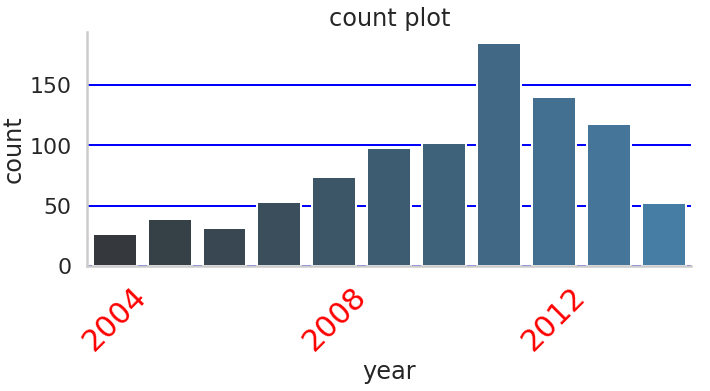

In [117]:
"""
    ---------------------------------------------------------------------------------------------------------
    sns.factorplot()   : BAR PLOT; DOT PLOT; LINE PLOT - this is too many different plots under one function
                         i would rather avoid using it., except for count plot.
                         
    FacetGrid          
    ---------------------------------------------------------------------------------------------------------
    
    1. main parameters:
    
    orient        : "v" | "h"
    kind          : {point, bar, count, box, violin, strip}
                    count : bar plot; it will automatically, count values labeled wiht x variable
    color         : one color used for all bards/points, unles using hue
    palette.      : if one dataset: must be a palletee or rgb, color code for each bar.
                    of with hue, one rgb for each dataset
      
    2. with hue
    col.          : /"colname in df"/, like hue, but makes separate subplots for each dataset
    row           : same as col, 
                    Important, row/col - unique values in each will determine nr of rows and col's on a plot


    3. data selection:
    order         : how to display bars, only the one in list will be shown!!!

"""

# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# DATA
planets = sns.load_dataset("planets")
planets.head()

# PLOT
sns.set_context("poster")
with sns.axes_style("whitegrid", {'grid.color':"blue"}):
    colors = sns.color_palette("Blues_d",n_colors=len(np.unique(planets.year)))
    g = sns.factorplot(x="year", data=planets, kind="count", aspect=2, palette=colors,   order=range(2004, 2015))
    g.set_xticklabels(step=4, rotation=45, color="red", fontsize=30);
    g.set(title="count plot")

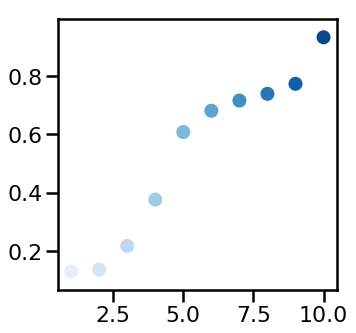

In [69]:
"""
    sns.color_palette()
    for categorical data or different datasets (not cmap)
"""

# PLOT
x = np.linspace(1,10,10)
y = np.sort(np.random.rand(10))
colors = sns.color_palette("Blues",10).as_hex()
colors = sns.color_palette("Blues",10)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x,y, c=colors)

In [1]:
"""
    polar plot
"""

import numpy as np,pandas as pd
import seaborn as sns

sns.set()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')
df


# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")

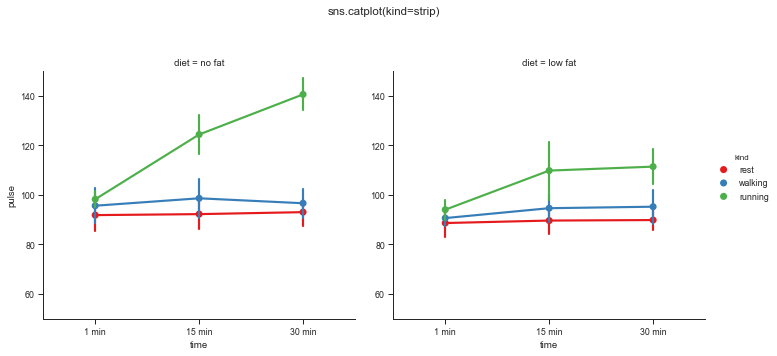

In [65]:
"""
    -------------------------------------------
    sns.catplot()
    -------------------------------------------
    

#   PLOT TYPES
    -------------------------------------------
    # Categorical scatterplots:
        * stripplot()              : "strip" - default !
        * swarmplot()              : "swarm"
   
    # Categorical distribution plots:
        * boxplot()                : "box"
        * violinplot()             : "violin"
        * boxenplot()              : "boxen"

    # Categorical estimate plots:
        * pointplot()              : "point"
        * barplot()                :  "bar"
        * countplot()              : "count"

#   PARAMETERS
    -------------------------------------------
    #   INPUT
        * x,y, data, 
        * hue, hue_order     : how the data are divided on each plot (Categorical)
        * row, col           : how the data are divided on different plots, (Categorical)
        * estimator          : eg: estimator=np.mean
                               Statistical function to estimate within each categorical bin
     
    #   ERROR BARS
        * ci                 : like on all other plots, number or "sd"
        * n_boot             : nr of bootstrap iter. to use when computing ci
    
    #   PLOT PARAMETERS:
        * kind.              : {“point”, “bar”, “strip”, “swarm”, “box”, “violin”, “boxen”}
    
    #.  PLOTTING
        * color              : one value, only
        * palette            : palette name, list, or dict; for hue params
        * orient             : “v” | “h”
        * row_order, col_order
        * order, hue_order
        * height             : in inches
        * aspect             : eg: aspect=2, the goid is 2x wider than its height
        * share{x,y}         : True/False
        * col_wrap.          : best see the example wiht countplot!
        
    #.  LEGEND
        * legend             : True/False
        * legend_out         : if True; the figure size will be extended, 
                               the legend will be drawn outside the plot on the center right
                               
    #.  kwargs
        additional arguments speciffic to ech plot type
    -------------------------------------------
"""

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

# simple example 
sns.set(style="ticks", context="paper")
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, col="diet",
                ci="sd", estimator=np.mean,
                kind="point",palette="Set1",sharex=False, sharey=False,
                legend_out=True)

# set limits
g.set(ylim=(50,150)) # title= it will be displayed on all subplots, even as list
g.fig.suptitle("sns.catplot(kind=strip)")
g.fig.subplots_adjust(top=0.8)

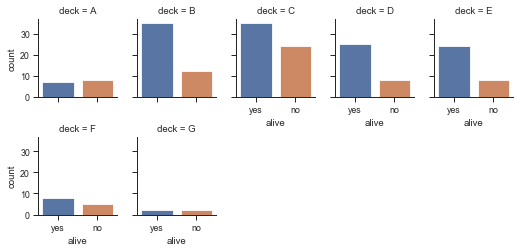

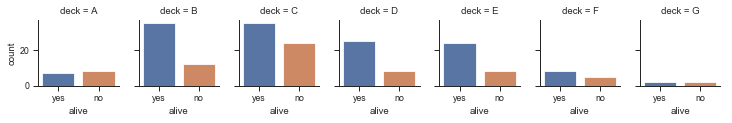

In [118]:
"""
    Countplot; 
    - kind="count", 
    - col_wrap       : how many plot will be diplayed in a columns
                       no row wrap!!!
                       IMPORTNAT, THAT FUNCTION CAN ONLY WRAP ITEMS IN COLUMN, 
                       it cant wrap, suplots assigned to different rows!
"""

# Make many column facets and wrap them into the rows of the grid:
titanic = sns.load_dataset("titanic")
titanic.head()

g = sns.catplot(
                # data for countplot, wihtout missing data in col "deck"
                x="alive", data=titanic[titanic.deck.notnull()],
                
                # divide plots, by "deck"
                col="deck", col_wrap=5,
                    
                # plot kind and settings
                kind="count", height=1.8, aspect=.8)

# same4 plot, col_wrap=7
g = sns.catplot(x="alive", data=titanic[titanic.deck.notnull()],
                col="deck", col_wrap=7,
                kind="count", height=1.8, aspect=.8)

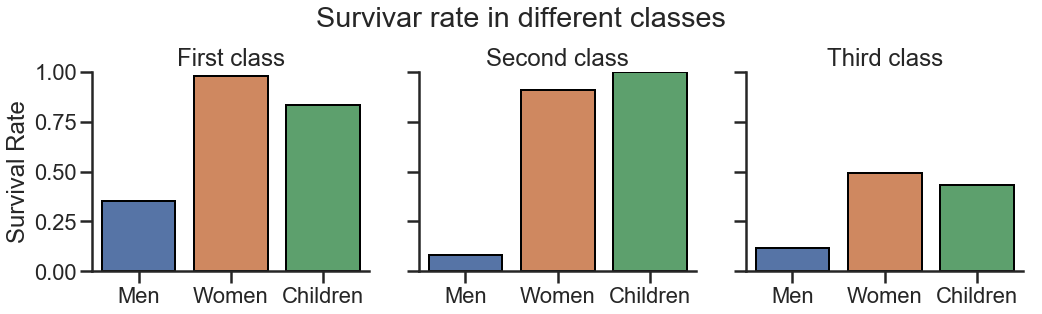

In [142]:
"""
    Use methods on the returned FacetGrid to tweak the presentation
    Caution:
    - bar plot return ratio, not count data!
      depsite data are binary 0=died, 1=survived    
"""

# barplot wiht catplop
sns.set(context="poster", style="ticks")
g = sns.catplot(x="who", y="survived", col="class", data=titanic, 
                     saturation=.8, estimator=np.mean,
                     kind="bar", ci=None, aspect=1, edgecolor="black")

# fig functions: (from some reason g=.fig... sometimes doenst work)
g.fig.suptitle("Survivar rate in different classes")
g.fig.subplots_adjust(top=0.8)

# FacetGrid functions:
g = g.set_axis_labels("", "Survival Rate")
g = g.set_xticklabels(["Men", "Women", "Children"])
g = g.set_titles("{col_name} {col_var}")
g = g.set(ylim=(0, 1))
g = g.despine()

In [140]:
titanic[titanic.deck.notnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


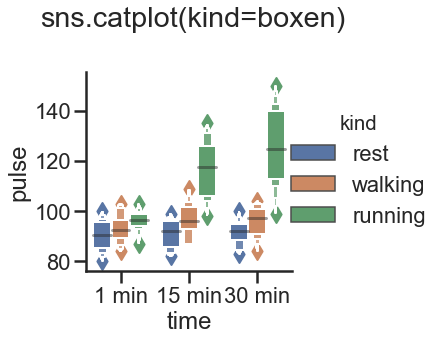

In [61]:
# kind = "boxen"
sns.set(style="ticks", context="poster")
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="boxen",legend_out=True)
g.fig.suptitle("sns.catplot(kind=boxen)")
g.fig.subplots_adjust(top=0.8)


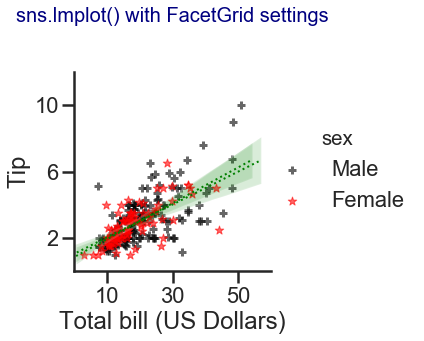

In [73]:
"""
    sns.lmplot()
    
    * regplot() on FacetGrid.
    * to plot data and regression model fits across many subplots
      with data divided by hue (each subplot), rows and col (different subplots)
    * subplots ==  facets in the grid
    
#   PARAMETERS
    -------------------------------------------
    #   INPUT
        * x,y, data,   : requires x,y, data on each plot
        * hue          : divides data into supgroups on each subplot, "colname from data_df"
        * col, row     : divide data into different subplots, "colname from data_df"
        * units        : "colname in data_df", If the x and y observations are nested within sampling units, 
                         those can be specified here, important for ci, because 
                         bootstrap will resample units and obervations. Do not affect LR line.
 
    #   PLOT PARAMETERS:
        * kind.        : NO KIND, thre is only one type of plot available - regplot()
                         with {scatter,line}_kws dictionaries for its componenets.
        * col_wrap.    : how, many faces per column, Caution, can be use only wiht col, i.e no row variable.   
    
    #.  PLOTTING
        * color              : one value, only
        * palette            : palette name, list, or dict; for hue params
        * {hue,col,row}_order: list, wiht variable names, 
        * height             : in inches
        * aspect             : eg: aspect=2, the goid is 2x wider than its height
        * share{x,y}         : True/False
        
    #   Legend
        * legend             : True/False
        * legend_out         : if True; the figure size will be extended, 
                               the legend will be drawn outside the plot on the center right
        - modiffication:     if you wish to customizen the legend more, set legend to false
                             and draw new one with g.fig.legend(all params you wish here)
        
    #   Scatter plot:
        *           Caution! : sns.regplot() donot have hue!, it is visible in kws     
        * scatter            : True/False
        * markers            : one marker, or a list, same lenght as variables in hue
        * scatter_kws        : eg: ={"s": 100, "color":"red","alpha":0.6},
        * {x,y}_jitter       : adds, random noise (x_jitter=10), to either yx or y axis, 
                               new values are only plotted, not used to fit regr line  
        
    #.  LINE
        * fit_reg            : True/False
        * line_kws           : eg: ={ "lw":2, "ls":":", "color":"navy" }
        
    #  MODELS  
       * order           : if >1, use numpy.polyfit to estim. a polynomial regression
       * logistic        : If True, assume that y is a binary var. and use statsmodels to estim log regr. model. 
                            CAUTION: it is more computationally intensive than linear regr.
                            thus, decrease the nr of bootstrap resamples (n_boot) or set ci to None.                 
       * lowess          : If True, nonparametric lowess model (locally weighted linear regression). 
                            CAUTION: onfidence intervals cannot currently be drawn for this kind of model.
       * robust          : If True, obust regression. This will de-weight outliers. 
                            CAUTION: it is more computationally intensive than linear regr.
                            thus, use the same stenp as in log. regr   
       * logx            : If True, linear regression of the form y ~ log(x), 
                            IMPORTANT : plot the scatterplot and regression model in the input space. 
                            IMPORTANT : x must be positive
                            
    #   error estimation
        ci                   : int in [0, 100],  None, "sd"
        n_boot               : int, Nr of bootstrap resamples used to estimate the ci

"""

import matplotlib.pyplot as plt, seaborn as sns
import numpy as np, pandas as pd
%matplotlib inline

# settings and data
sns.set(context="poster", style="ticks")
tips = sns.load_dataset("tips")
tips.head()

# plot
g = sns.lmplot( 
                # Data
                x="total_bill", y="tip", data=tips, hue="sex", 

                # plot settings
                markers=["+", "*"], palette=["black","red"],
    
                # scatter
                scatter=True, scatter_kws={"s": 80,"alpha":0.6},
    
                # line
                fit_reg=True, line_kws={ "lw":2, "ls":":", "color":"green" },
                
                # legend
                legend = True, legend_out=True
)

# use methods from facetGrid
g.fig.suptitle("sns.lmplot() with FacetGrid settings", fontsize=20, ha="center", color="navy")
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=.02, top=0.8)

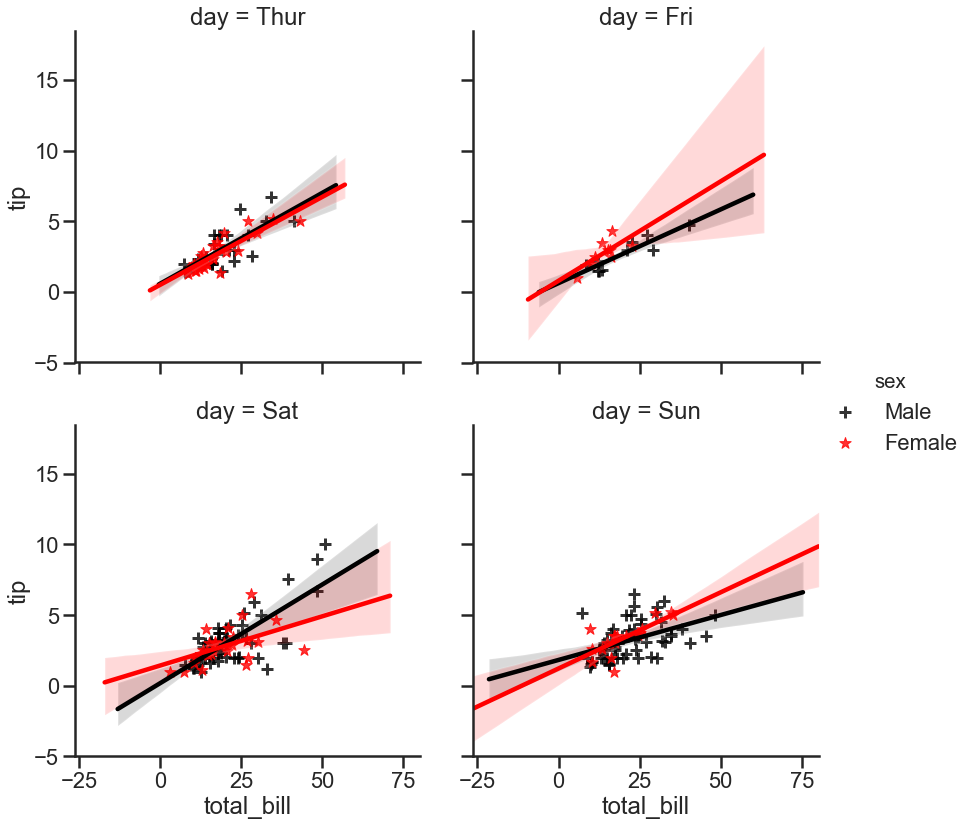

In [58]:
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np, pandas as pd
%matplotlib inline

# settings and data
sns.set(context="poster", style="ticks")
tips = sns.load_dataset("tips")

# plot
g = sns.lmplot( 
                # Data
                x="total_bill", y="tip", data=tips, hue="sex", 
    
                # rows, cols
                col="day",col_wrap=2,

                # plot settings
                markers=["+", "*"], palette=dict(Male="black",Female="red"),
                height=6, aspect=1,
                
                # legend
                legend = True, legend_out=True
)

In [ ]:
"""
    -------------------------------------------
    sns.FacetGrid
    -------------------------------------------


#   INFO
    -------------------------------------------
    Multi-plot grid for plotting conditional relationships
    CALLED: “lattice”, “trellis”, or “small-multiple” graphics
    https://seaborn.pydata.org/generated/seaborn.FacetGrid.html  
    
    
    
    
"""



In [32]:
dict(Male="blue",Female="red")

{'Male': 'blue', 'Female': 'red'}

In [187]:
"""
=============
Multipage PDF
=============

This is a demo of creating a pdf file with several pages,
as well as adding metadata and annotations to pdf files.

If you want to use a multipage pdf file using LaTeX, you need
to use `from matplotlib.backends.backend_pgf import PdfPages`.
This version however does not support `attach_note`.


import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.
with PdfPages('multipage_pdf.pdf') as pdf:
    plt.figure(figsize=(3, 3))
    plt.plot(range(7), [3, 1, 4, 1, 5, 9, 2], 'r-o')
    plt.title('Page One')
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

    # if LaTeX is not installed or error caught, change to `usetex=False`
    plt.rc('text', usetex=True)
    plt.figure(figsize=(8, 6))
    x = np.arange(0, 5, 0.1)
    plt.plot(x, np.sin(x), 'b-')
    plt.title('Page Two')
    pdf.attach_note("plot of sin(x)")  # you can add a pdf note to
                                       # attach metadata to a page
    pdf.savefig()
    plt.close()

    plt.rc('text', usetex=False)
    fig = plt.figure(figsize=(4, 5))
    plt.plot(x, x ** 2, 'ko')
    plt.title('Page Three')
    pdf.savefig(fig)  # or you can pass a Figure object to pdf.savefig
    plt.close()

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = 'Multipage PDF Example'
    d['Author'] = 'Jouni K. Sepp\xe4nen'
    d['Subject'] = 'How to create a multipage pdf file and set its metadata'
    d['Keywords'] = 'PdfPages multipage keywords author title subject'
    d['CreationDate'] = datetime.datetime(2009, 11, 13)
    d['ModDate'] = datetime.datetime.today()
"""

'\n=============\nMultipage PDF\n=============\n\nThis is a demo of creating a pdf file with several pages,\nas well as adding metadata and annotations to pdf files.\n\nIf you want to use a multipage pdf file using LaTeX, you need\nto use `from matplotlib.backends.backend_pgf import PdfPages`.\nThis version however does not support `attach_note`.\n\n\nimport datetime\nimport numpy as np\nfrom matplotlib.backends.backend_pdf import PdfPages\nimport matplotlib.pyplot as plt\n\n# Create the PdfPages object to which we will save the pages:\n# The with statement makes sure that the PdfPages object is closed properly at\n# the end of the block, even if an Exception occurs.\nwith PdfPages(\'multipage_pdf.pdf\') as pdf:\n    plt.figure(figsize=(3, 3))\n    plt.plot(range(7), [3, 1, 4, 1, 5, 9, 2], \'r-o\')\n    plt.title(\'Page One\')\n    pdf.savefig()  # saves the current figure into a pdf page\n    plt.close()\n\n    # if LaTeX is not installed or error caught, change to `usetex=False`\n   

In [14]:

### water in ice

earth_surface_area = 510*10**6
arctic_surface_area = 14*10**6
greenland_surface_area = 2.2*10**6

acrtic_ice_thickness = 1.9
greenland_ice_thickness = 2

total_ice_to_melt = arctic_surface_area*acrtic_ice_thickness + greenland_surface_area*greenland_ice_thickness 
total_ice_to_melt/earth_surface_area

0.060784313725490195

In [7]:
arctic_surface_area

14000000

In [10]:
26.5 / 14

1.8928571428571428